##### Lending Club Case Study

'loan.csv' file contains details requried for the case study

Problem Statement : <br> 
Anaylise applicants data find the defaulters that is to identify the risky loan applicants who are not cable of paying back the loan.Then such loans can be reduced thereby cutting down the amount of credit loss.

import libraries <br>
missingno library is added to understand the missing data within pandas dataframe

In [1]:
pip install missingno

In [2]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Analysing the data

In [3]:
#load csv file
loan = pd.read_csv('loan.csv')

C:\Users\I334253\AppData\Local\Temp\ipykernel_29848\925936626.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


### Display loan details

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Get all columns

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Clean Up
To analise any data first step would be cleaning up the data <br>

In [6]:
#Exploring null values with Pandas
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [7]:
mask=loan.isna().sum()
drop_columns = mask[mask>32000]
drop_columns.info()

<class 'pandas.core.series.Series'>
Index: 56 entries, mths_since_last_record to total_il_high_credit_limit
Series name: None
Non-Null Count  Dtype
--------------  -----
56 non-null     int64
dtypes: int64(1)
memory usage: 896.0+ bytes


#### There are so many columns thats why visualising data with pandas is bit difficult. Hence now will make use of missingno library.

#### Display all columns whose values is null with missingno

<Axes: >

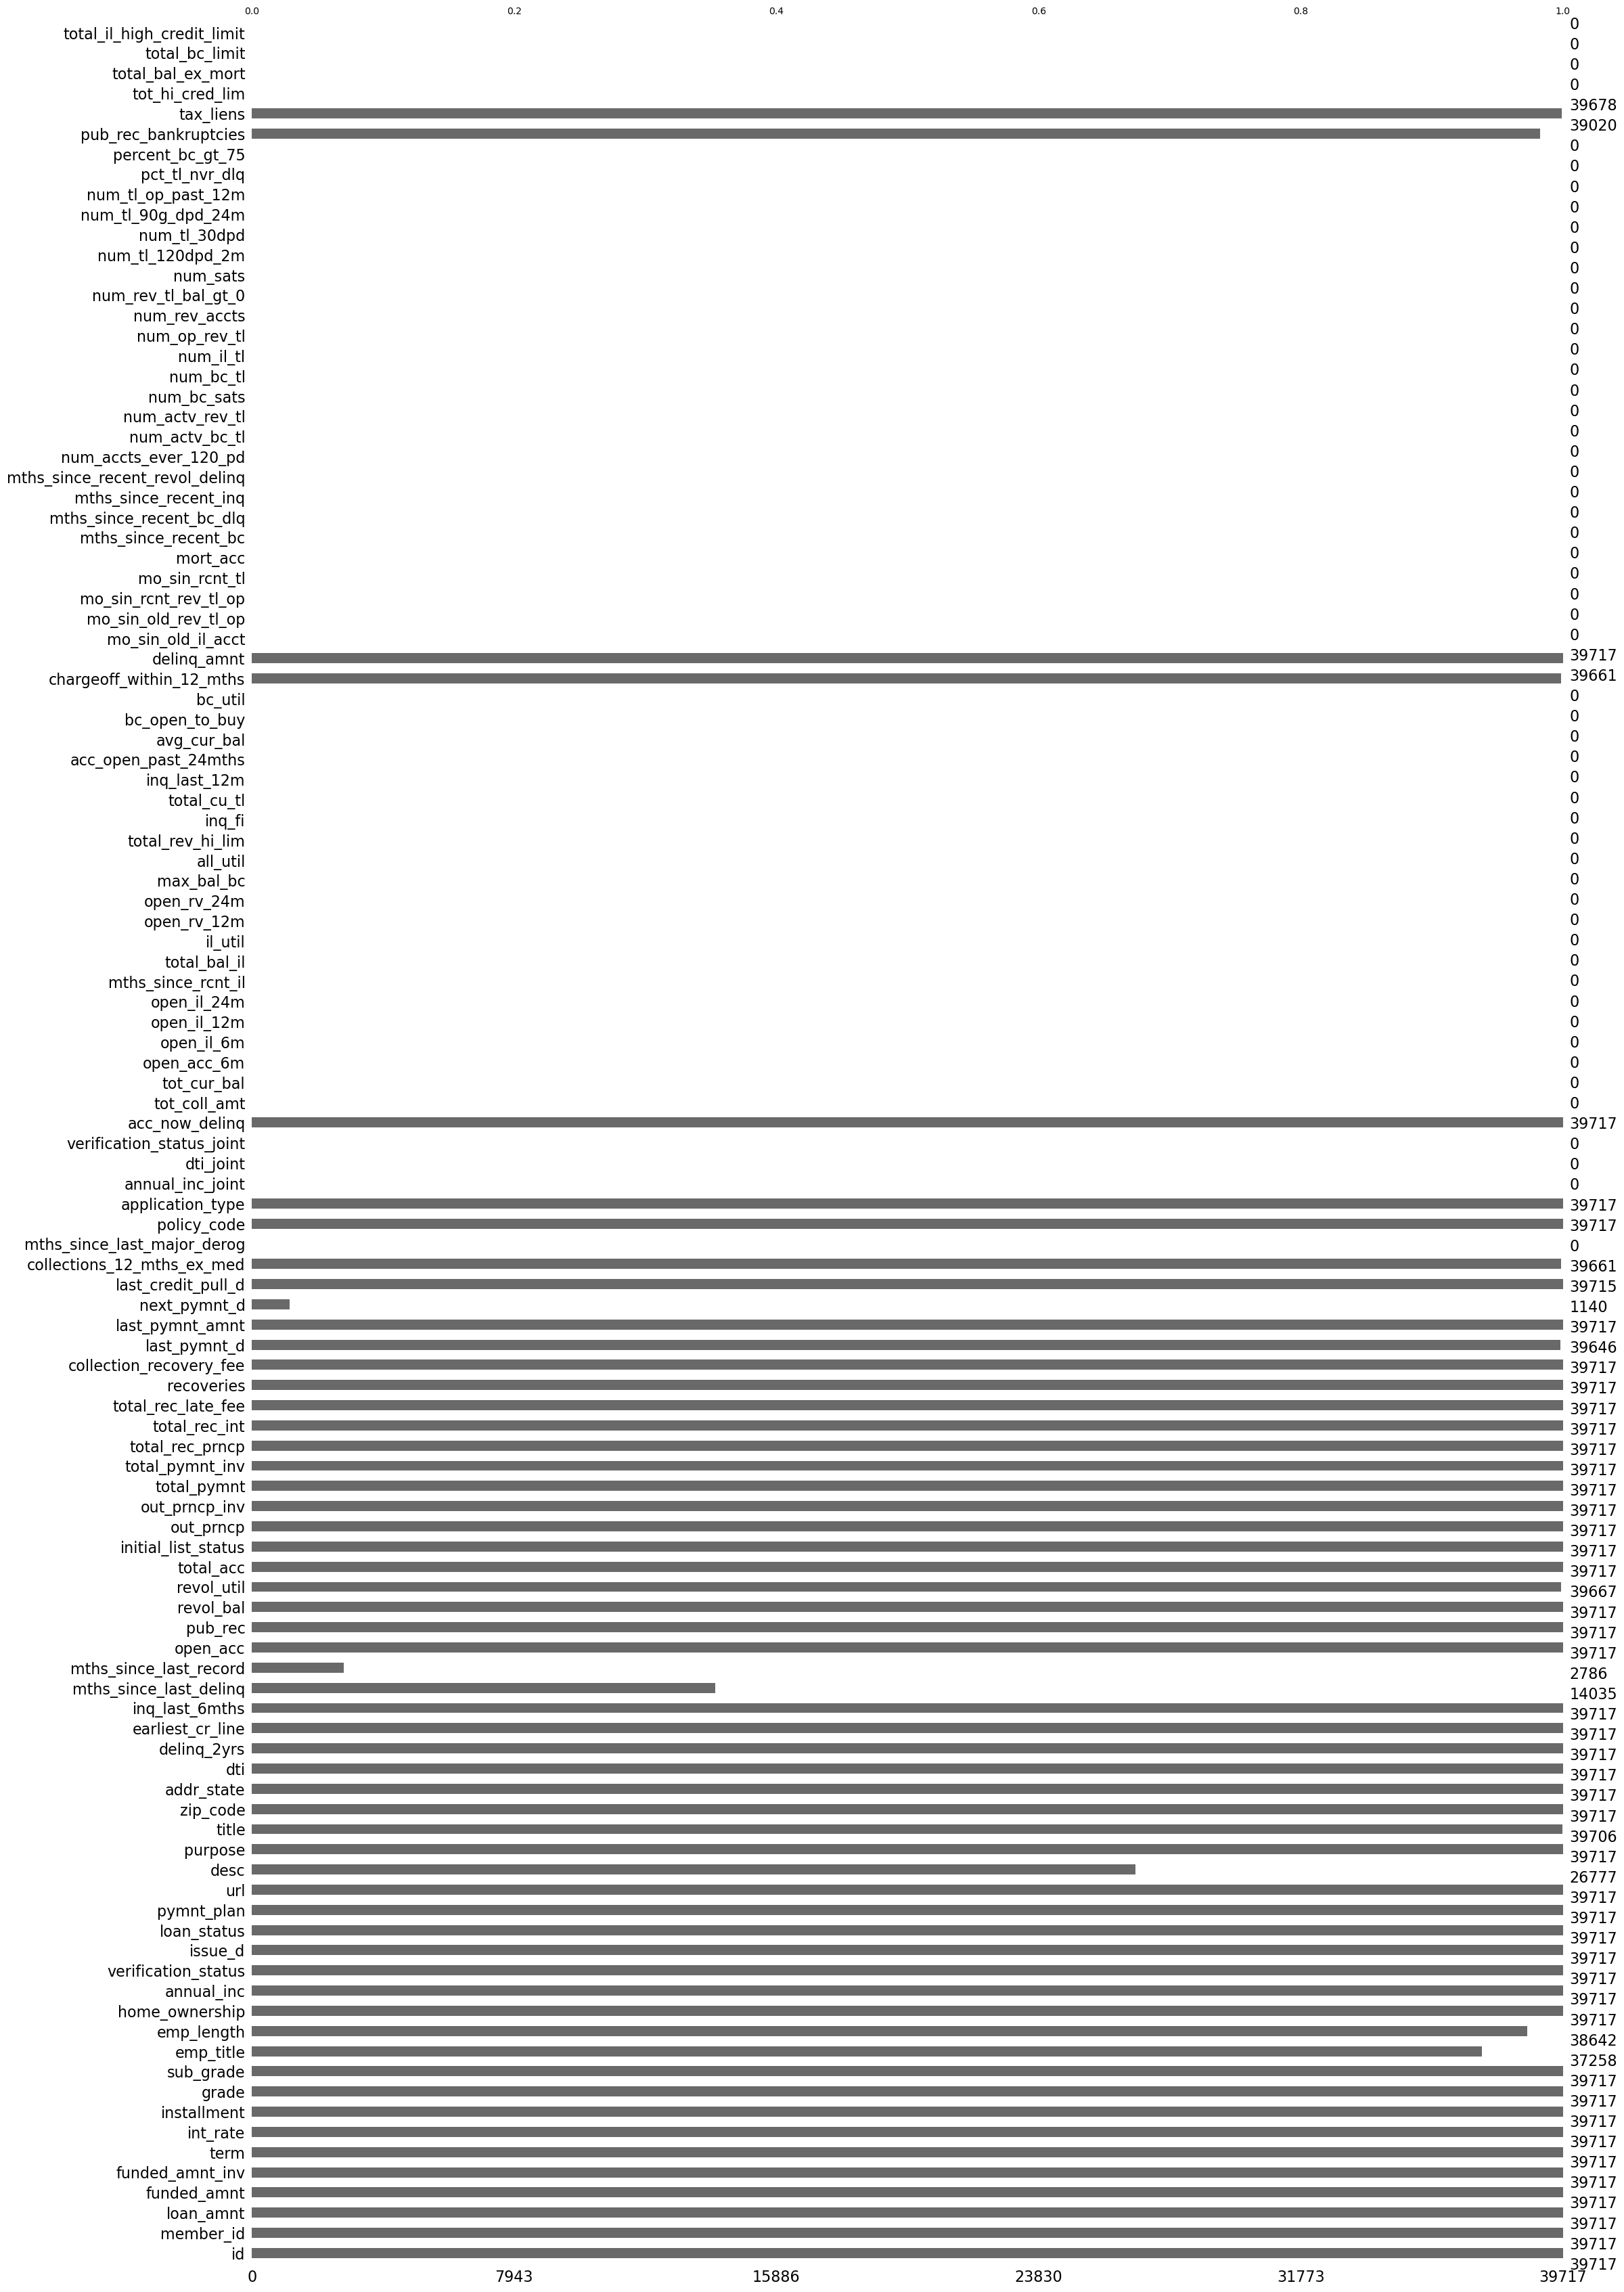

In [8]:
msno.bar(loan)

<Axes: >

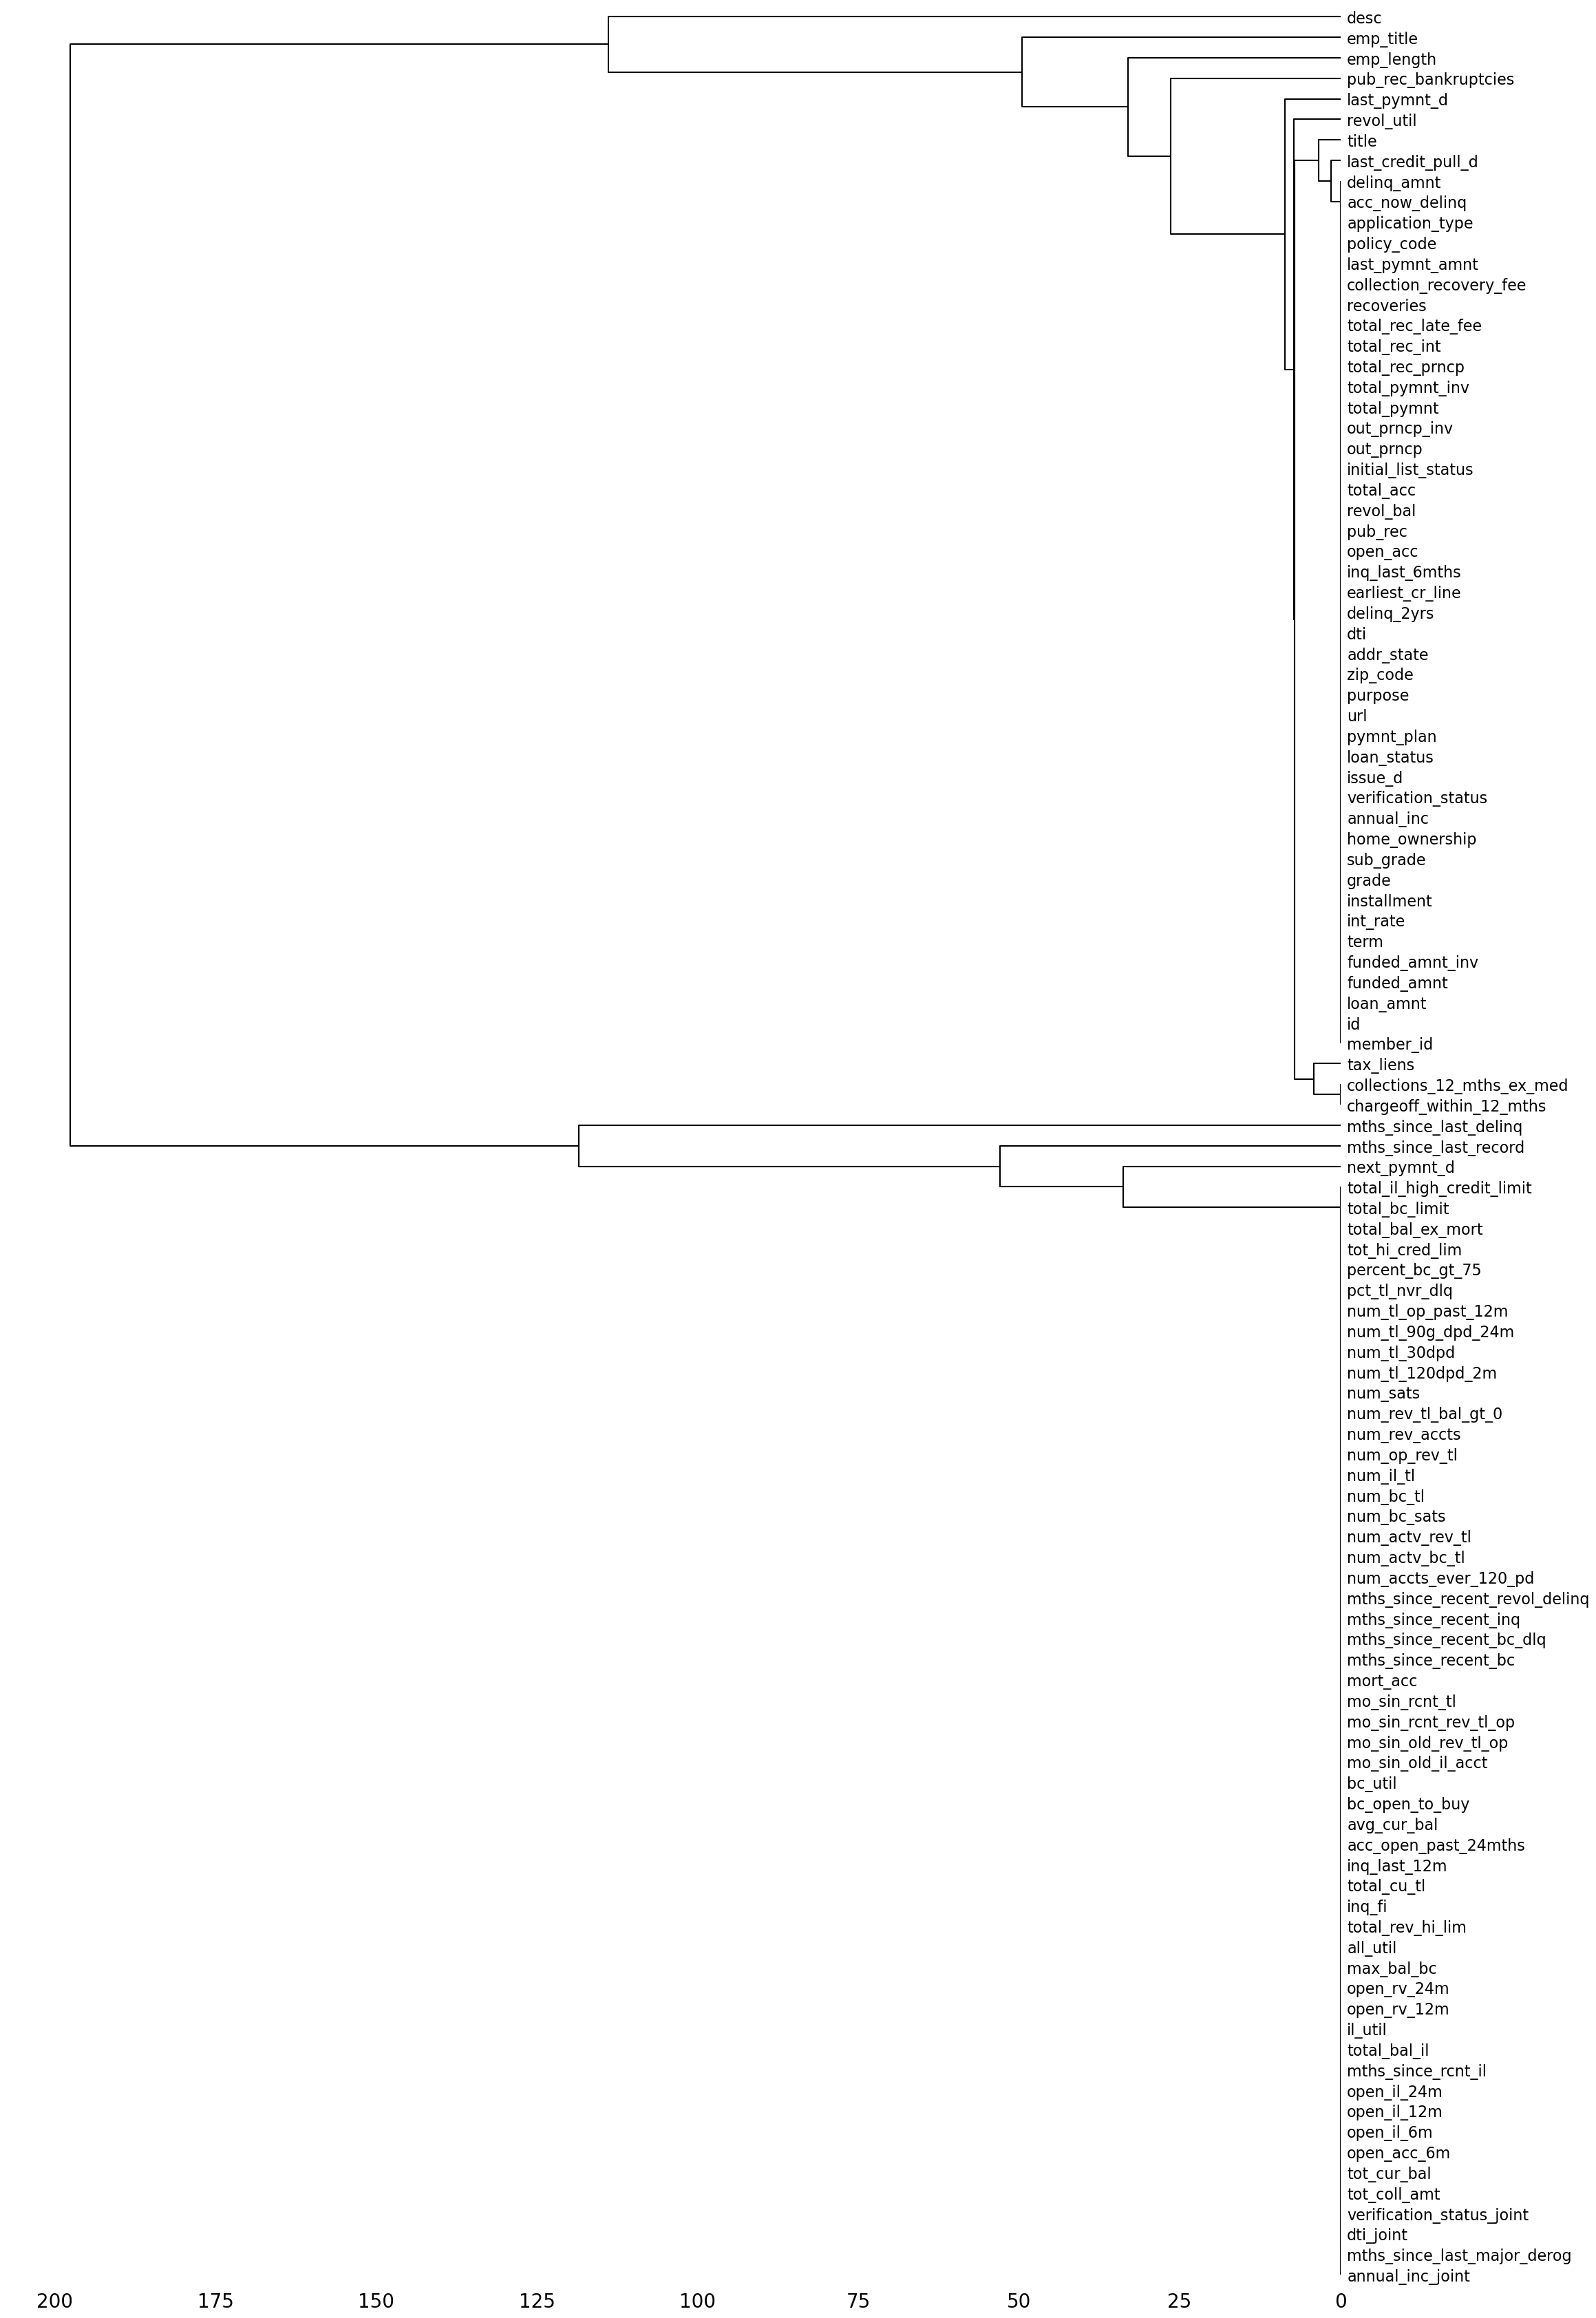

In [9]:
msno.dendrogram(loan)

#### Get number of columns with all rows null 

In [10]:
loan.columns[loan.isnull().all()].size

54

#### Drop all the columns with all null values. Currently this data set has 54 coulmns with all rows are missing

In [11]:
#Dropping columns with all rows null
loan= loan.dropna(axis = 1,how = 'all')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Display the loan details with missingo Graph to check if there is any null value left

<Axes: >

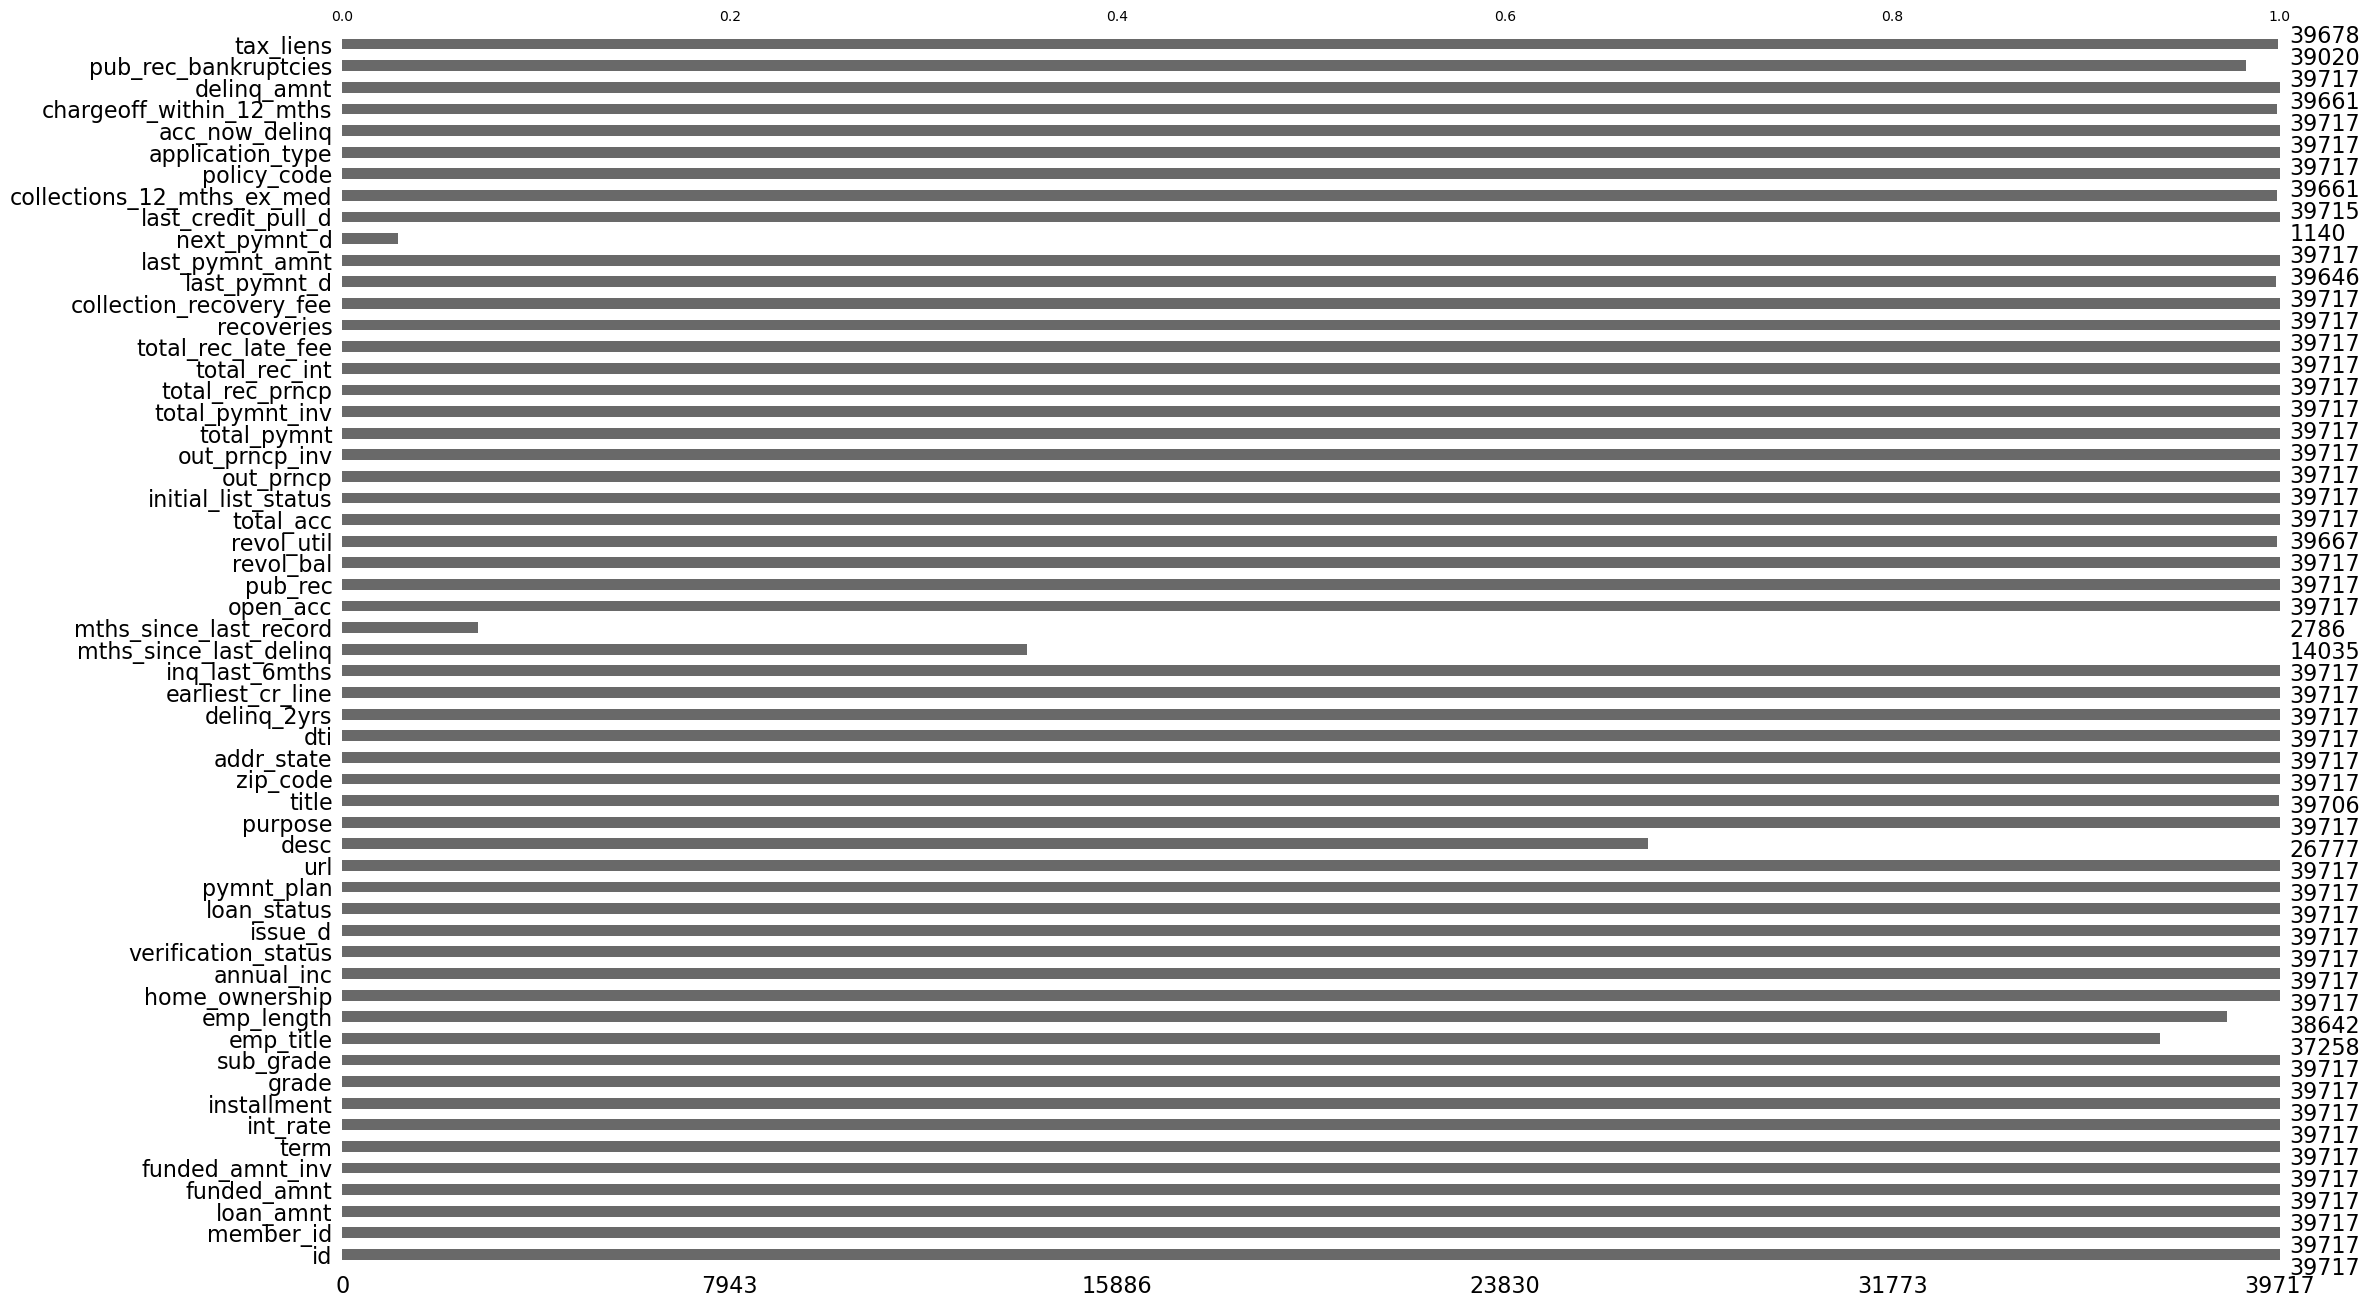

In [12]:
msno.bar(loan)

#### Removing all the columns whose null/NAN is more than 80%<br> from above bar graph next_pymnt_d and mths_since_last_record is having more than 80% of missing data so removing these 2 columns

<Axes: >

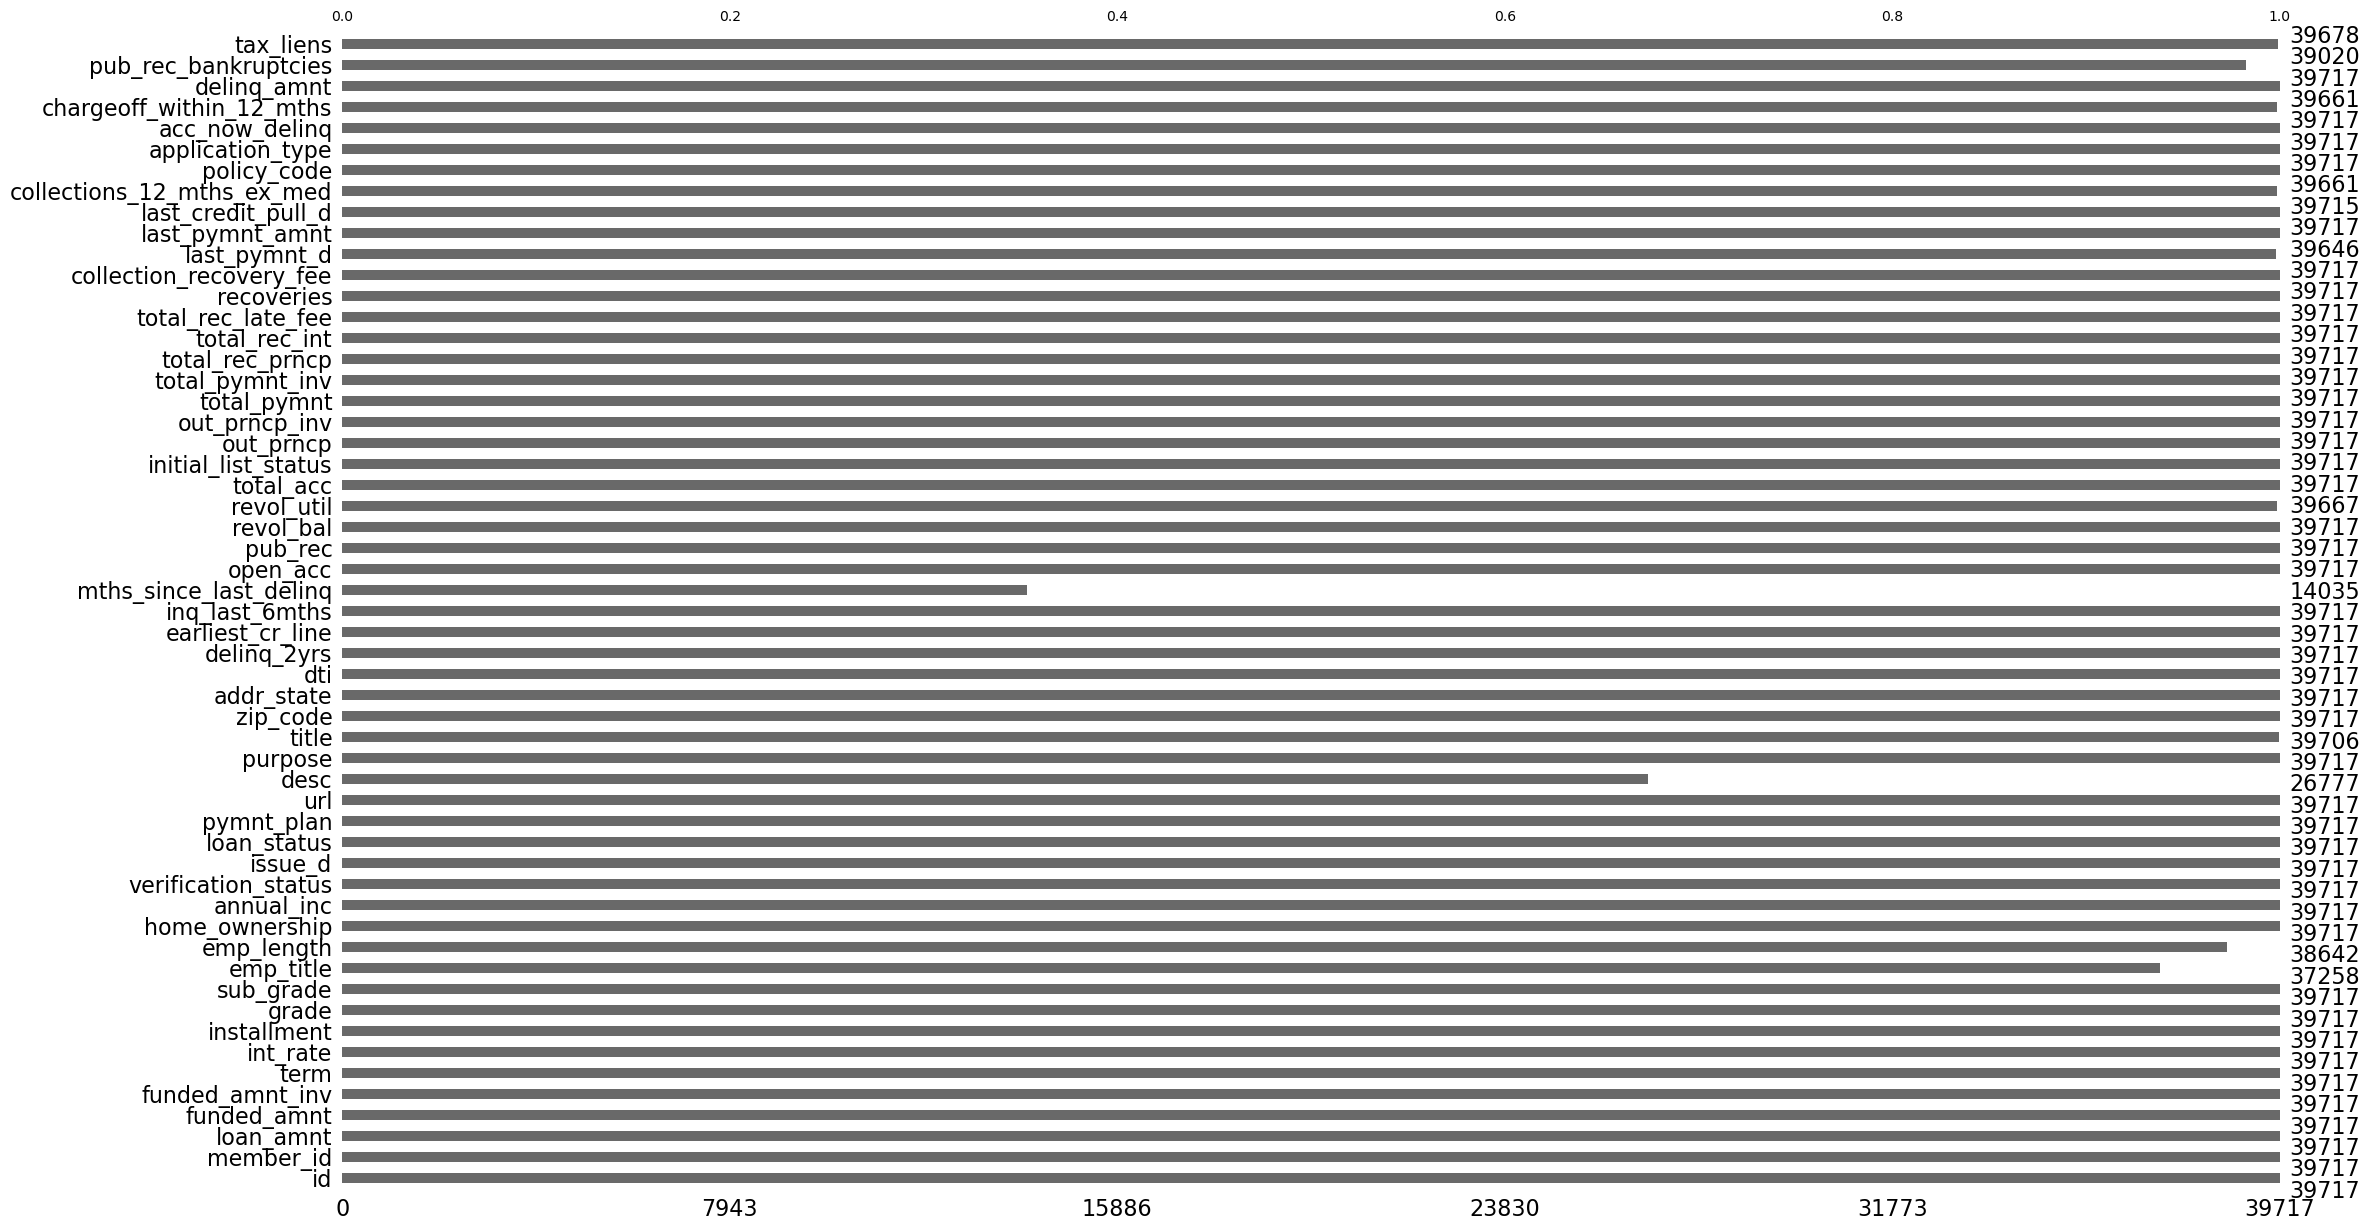

In [13]:
loan=loan.drop(axis='columns',columns='next_pymnt_d', errors='ignore')
loan=loan.drop(axis='columns',columns='mths_since_last_record', errors='ignore')
msno.bar(loan)


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### check for all the columns with unique values


In [15]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

#### remove all the columns whose unique value count is 1

In [16]:
loan = loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1)

In [17]:
# check again for unique count 
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal 

#### Remove all Customer Behavior variable as these are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.

In [18]:
#Added all the customer behavior variables to a list
cust_behav_variables=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [19]:
# drop all customer behavior variable
loan = loan.drop(cust_behav_variables,axis=1, errors='ignore')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [20]:
# lets look at the data
loan.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ...  loan_status  \
0   10.65%       162.87     B        B2  ...   Fully Paid   
1   15.27%        59.83     C        C4  ...  Charged Off   
2   15.96%        84.33     C        C5  ...   Fully Paid   
3   13.49%       339.31     C        C1  ...   Fully Paid   
4   12.69%        67.79     B        B5  ...      Current   
5    7.90%       156.46     A        A4  ...   Fully Paid   
6   15.96%       170.08     C        C5  ...   Fully Paid   
7   18.64%       109.43     E        E1  ...   Fully Paid   
8   21.28%       152.39     F        F2  ...  Charged Off   
9   12.69%       121.45     B        B5  ...  Charged Off   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   
5  https://lendingclub.com/browse/loanDetail.acti...   
6  https://lendingclub.com/browse/loanDetail.acti...   
7  https://lendingclub.com/browse/loanDetail.acti...   
8  https://lendingclub.com/browse/loanDetail.acti...   
9  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11 > I own a small h...      small_business   
9    Borrower added on 12/16/11 > I'm trying to b...               other   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
4                               Personal    972xx         OR  17.94   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   
6                                   Loan    280xx         NC  23.51   
7                        Car Downpayment    900xx         CA   5.35   
8   Expand Business & Buy Debt Portfolio    958xx         CA   5.55   
9            Building my credit history.    774xx         TX  18.08   

  mths_since_last_delinq pub_rec_bankruptcies  
0                    NaN                  0.0  
1                    NaN                  0.0  
2                    NaN                  0.0  
3                   35.0                  0.0  
4

In [21]:
# lets look at the date column
loan.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [22]:
# checking unique values in emp_title to see if they can help in analysis
mask1=loan.emp_title.value_counts()
mask1[mask1==1]

Southeast Metro Stormwater Authority    1
Energy Developments Inc                 1
Memorial Sloan-Kettering Cancer Ctr     1
Acs                                     1
HORIZON BLUE CROSS BLUE SHIELD          1
                                       ..
Community College of Philadelphia       1
AMEC                                    1
lee county sheriff                      1
Bacon County Board of Education         1
Evergreen Center                        1
Name: emp_title, Length: 25641, dtype: int64

In [23]:
loan.nunique()

id                        39717
member_id                 39717
loan_amnt                   885
funded_amnt                1041
funded_amnt_inv            8205
term                          2
int_rate                    371
installment               15383
grade                         7
sub_grade                    35
emp_title                 28820
emp_length                   11
home_ownership                5
annual_inc                 5318
verification_status           3
issue_d                      55
loan_status                   3
url                       39717
desc                      26527
purpose                      14
title                     19615
zip_code                    823
addr_state                   50
dti                        2868
mths_since_last_delinq       95
pub_rec_bankruptcies          3
dtype: int64

<Axes: >

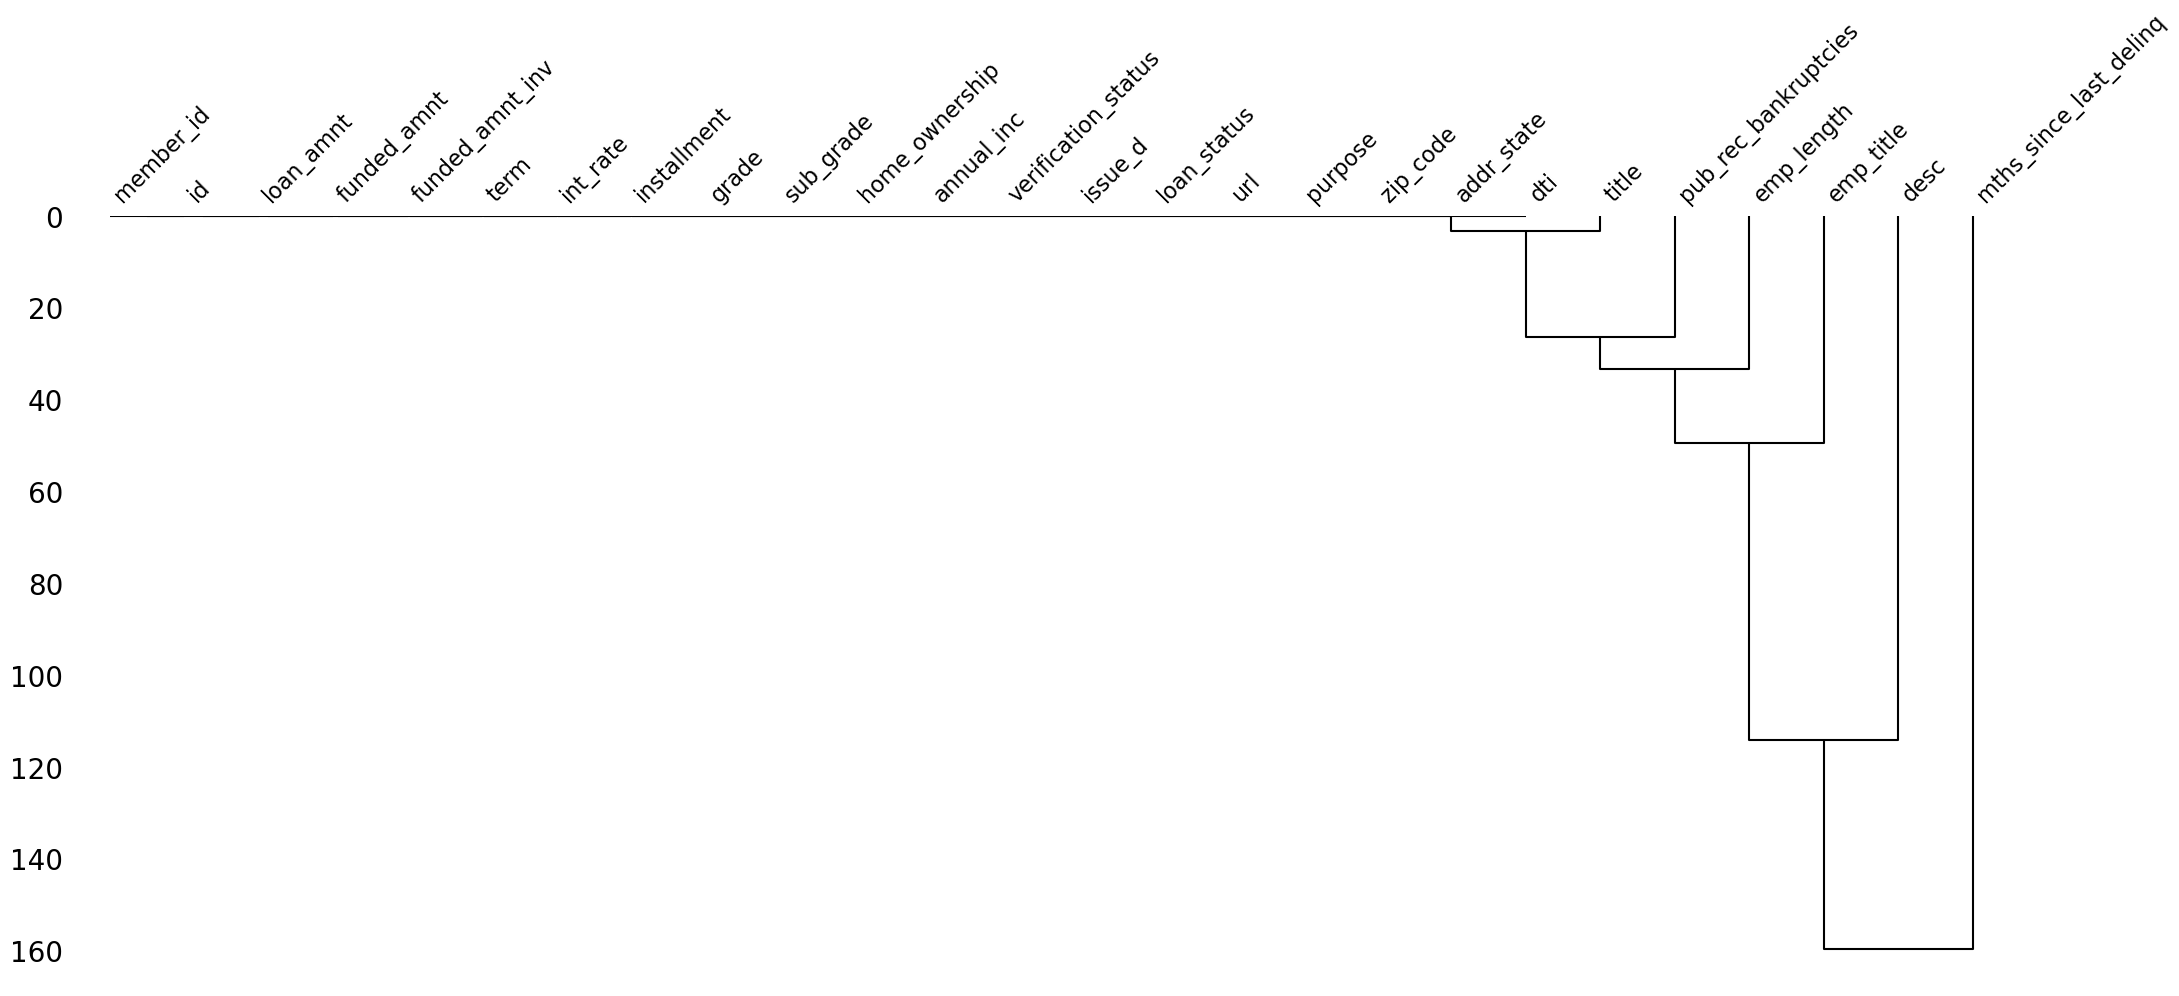

In [24]:
msno.dendrogram(loan)

In [25]:
loan.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [26]:
print(loan.loan_status[loan.mths_since_last_delinq==0].value_counts())
print(loan.loan_status[loan.mths_since_last_delinq==30].value_counts())

Fully Paid     376
Charged Off     67
Name: loan_status, dtype: int64
Fully Paid     206
Charged Off     37
Current          4
Name: loan_status, dtype: int64


<Axes: >

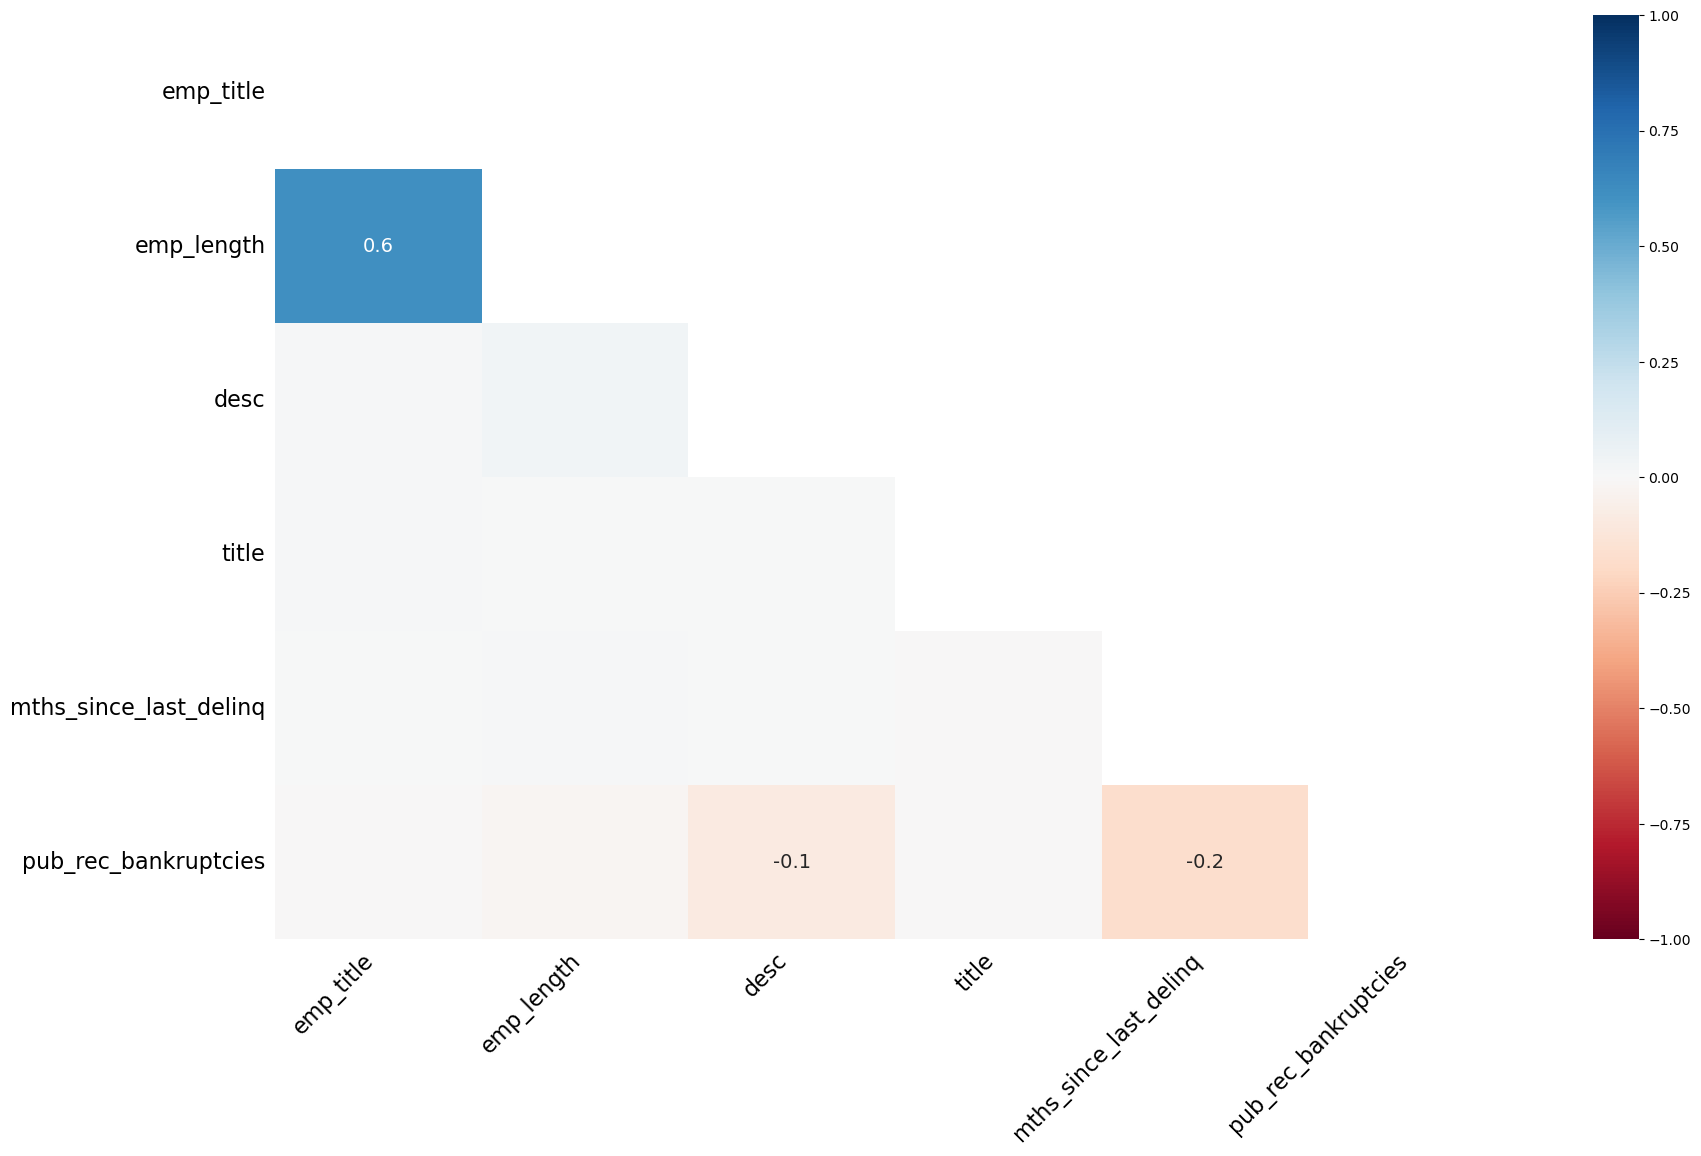

In [27]:
msno.heatmap(loan)

In [28]:
loan.installment.value_counts()

311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64

In [29]:
#trying to see if monthly income is more than the instllment required to pay.
monthly_inc = loan.annual_inc/12-loan.installment
monthly_inc.describe()

count     39717.000000
mean       5422.848609
std        5263.410214
min         252.020000
25%        3149.913333
50%        4536.803333
75%        6488.613333
max      499832.160000
dtype: float64

In [30]:
loan.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [31]:
loan.loan_status[loan.verification_status == 'Verified'][loan.annual_inc/12-loan.installment<10000].value_counts()

Fully Paid     8892
Charged Off    1898
Current         526
Name: loan_status, dtype: int64

#### Cleaning up Data which is not needed for the analysis
##### id,member_id : Since the id is unique to each applicant which is not needed for the analysis, nor its a time series data so we can drop the ID columns. 
##### emp_title : The title of the employee keeps changing doesn't contribute to the analysis, more then half of values are unique.
##### mths_since_last_delinq : Data is not correlated and won't contribute much to analysis.
##### url,desc,title,addr_state,zip_code : geo details are not required for the analysis


In [32]:
#list all the coulmns that can be removed as mentioned above
irr_columns = ['id','member_id','emp_title','url','desc','title','addr_state','mths_since_last_delinq','zip_code']

In [33]:
loan = loan.drop(irr_columns,axis=1,errors='ignore')

In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

<Axes: >

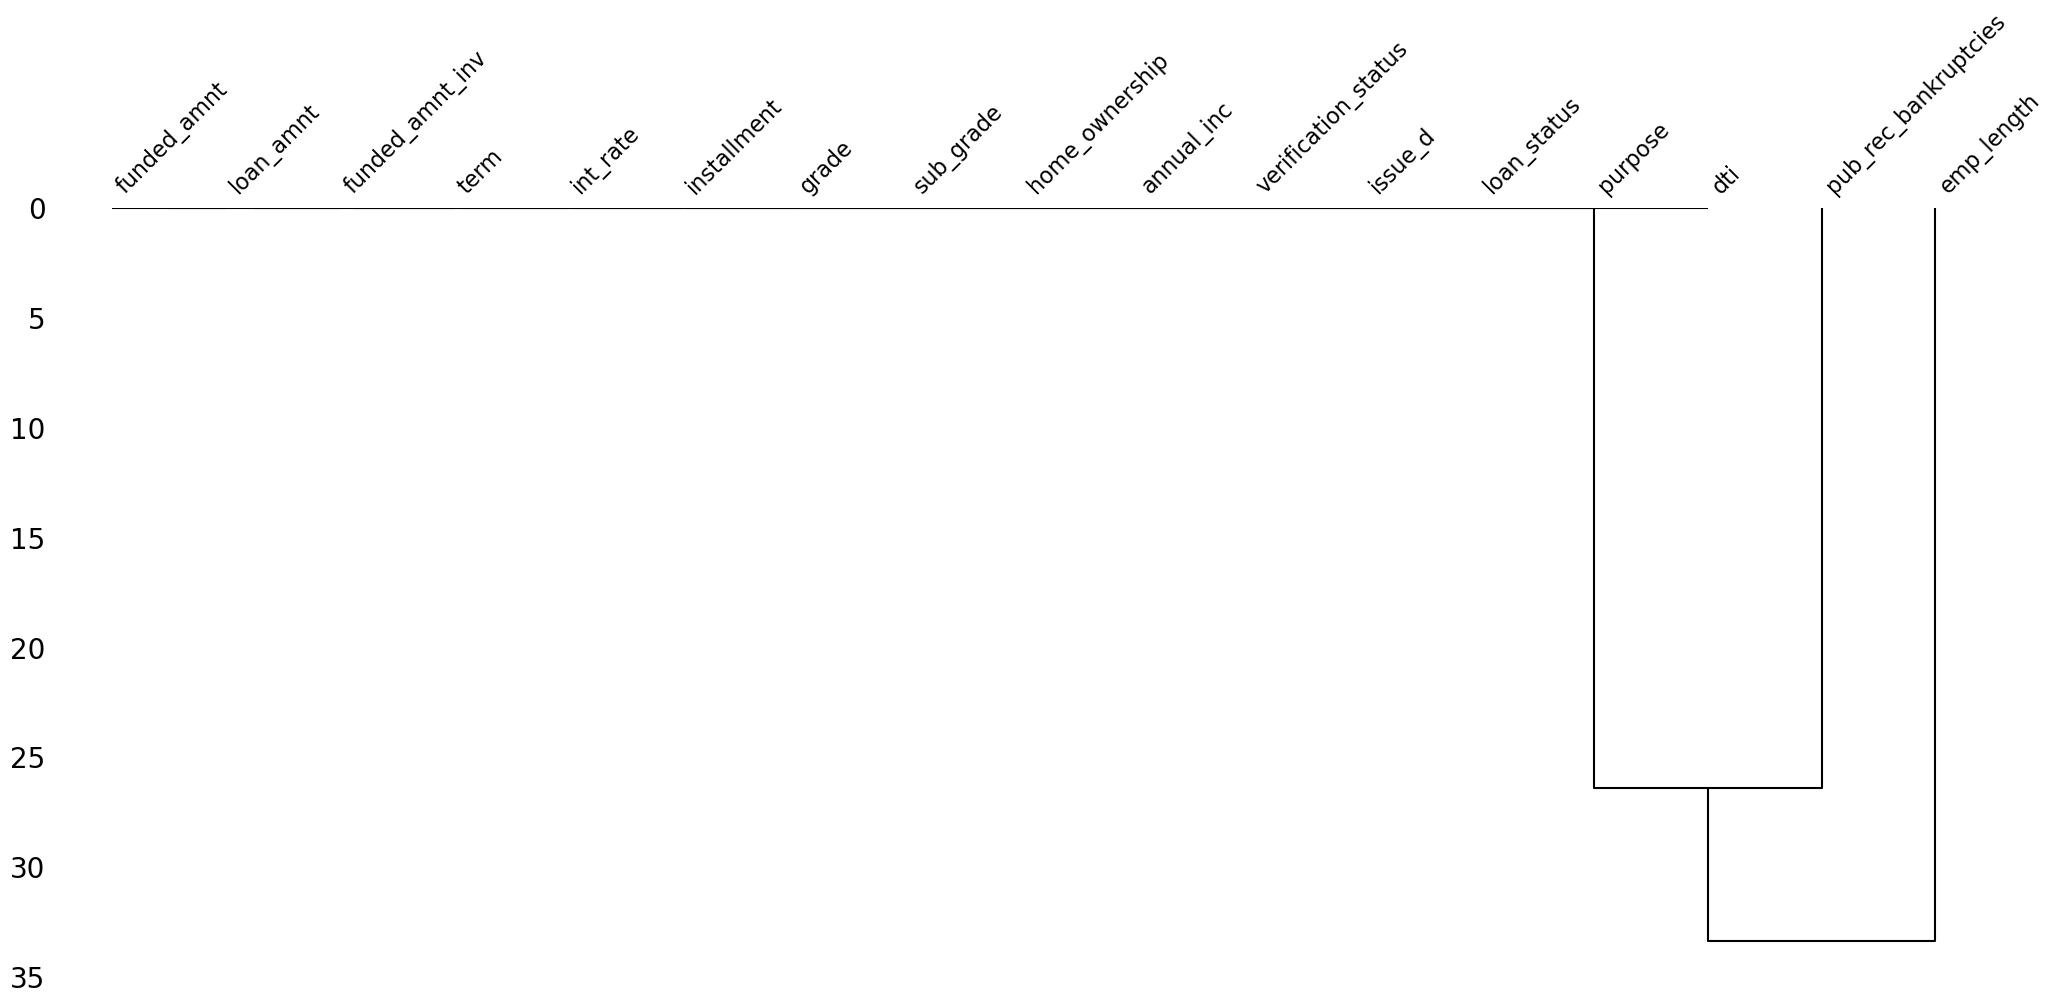

In [35]:
msno.dendrogram(loan)

### Data Analysis <br> Check on the data type of all the columns. Remove unwanted data and convert the column to the right datatype

In [36]:
print(loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [37]:
# remove all the rows whose loan status is "current" as the current loan holders details will not determine whether that applicant
#fully pay the loan or charged-off
loan = loan[~(loan['loan_status']=='Current')]

In [38]:
loan.head(10)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0        5000         5000           4975.0   36 months   10.65%       162.87   
1        2500         2500           2500.0   60 months   15.27%        59.83   
2        2400         2400           2400.0   36 months   15.96%        84.33   
3       10000        10000          10000.0   36 months   13.49%       339.31   
5        5000         5000           5000.0   36 months    7.90%       156.46   
6        7000         7000           7000.0   60 months   15.96%       170.08   
7        3000         3000           3000.0   36 months   18.64%       109.43   
8        5600         5600           5600.0   60 months   21.28%       152.39   
9        5375         5375           5350.0   60 months   12.69%       121.45   
10       6500         6500           6500.0   60 months   14.65%       153.45   

   grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0      B        B2  10+ years           RENT     24000.0            Verified   
1      C        C4   < 1 year           RENT     30000.0     Source Verified   
2      C        C5  10+ years           RENT     12252.0        Not Verified   
3      C        C1  10+ years           RENT     49200.0     Source Verified   
5      A        A4    3 years           RENT     36000.0     Source Verified   
6      C        C5    8 years           RENT     47004.0        Not Verified   
7      E        E1    9 years           RENT     48000.0     Source Verified   
8      F        F2    4 years            OWN     40000.0     Source Verified   
9      B        B5   < 1 year           RENT     15000.0            Verified   
10     C        C3    5 years            OWN     72000.0        Not Verified   

   issue_d  loan_status             purpose    dti  pub_rec_bankruptcies  
0   Dec-11   Fully Paid         credit_card  27.65                   0.0  
1   Dec-11  Charged Off                 car   1.00                   0.0  
2   Dec-11   Fully Paid      small_business   8.72                   0.0  
3   Dec-11   Fully Paid               other  20.00                   0.0  
5   Dec-11   Fully Paid             wedding  11.20                   0.0  
6   Dec-11   Fully Paid  debt_consolidation  23.51                   0.0  
7   Dec-11   Fully Paid                 car   5.35                   0.0  
8   Dec-11  Charged Off      small_business   5.55                   0.0  
9   Dec-11  Charged Off               other  18.08                   0.0  
10  Dec-11   Fully Paid  debt_consolidation  16.12                   0.0

In [39]:
print(loan['term'].unique())

[' 36 months' ' 60 months']


In [40]:
# remove "months" from term column and convert the data to integer type
loan['term'] = loan['term'].apply(lambda term:term if isinstance(term,int) else int(term.replace(' months','')))
print(loan['term'].unique())
print(loan['term'].dtype)

[36 60]
int64


In [41]:
# remove "%" from int_rate
loan['int_rate'] = loan['int_rate'].apply(lambda rate:rate if isinstance(rate,float) else float(rate.replace('%','')))
print(loan['int_rate'])

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64


#### Clean up emp_legth  data as it contans <,>,+, years. Convert the data to approximate years by removing these symbols.


In [42]:
def cleanEmploymentLength(x):
  years = 'years'
  year = 'year'
  lessthan = '<'
  notapp = 'n/a'
  plus = '+'
  if years in x:
    x = x.replace(years,'')
  if year in x:
    x = x.replace(year,'')
  if lessthan in x:
    x = x.replace(lessthan,'')
  if notapp in x:
    x = x.replace(notapp,'0')
  if plus in x:
    x = x.replace(plus,'')
  return int(x.strip())
loan['emp_length'] = loan['emp_length'].fillna('n/a')
loan['emp_length'] = loan['emp_length'].apply(cleanEmploymentLength)

In [111]:
# Extract Month from loan  issued date and add it to separate column

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month']=loan['issue_d'].dt.month
loan['issue_year']=loan['issue_d'].dt.year

In [44]:
# Derive one more column containing difference of monthly income and installment.
loan['diff_monthly_inc_and_installment'] = loan.annual_inc/12-loan.installment

In [45]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   loan_amnt                         38577 non-null  int64         
 1   funded_amnt                       38577 non-null  int64         
 2   funded_amnt_inv                   38577 non-null  float64       
 3   term                              38577 non-null  int64         
 4   int_rate                          38577 non-null  float64       
 5   installment                       38577 non-null  float64       
 6   grade                             38577 non-null  object        
 7   sub_grade                         38577 non-null  object        
 8   emp_length                        38577 non-null  int64         
 9   home_ownership                    38577 non-null  object        
 10  annual_inc                        38577 non-nu

In [46]:
loan.head(5)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   
2       2400         2400           2400.0    36     15.96        84.33     C   
3      10000        10000          10000.0    36     13.49       339.31     C   
5       5000         5000           5000.0    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           1           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
5        A4           3           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose    dti  pub_rec_bankruptcies  \
0 2011-12-01   Fully Paid     credit_card  27.65                   0.0   
1 2011-12-01  Charged Off             car   1.00                   0.0   
2 2011-12-01   Fully Paid  small_business   8.72                   0.0   
3 2011-12-01   Fully Paid           other  20.00                   0.0   
5 2011-12-01   Fully Paid         wedding  11.20                   0.0   

   issue_month  diff_monthly_inc_and_installment  
0           12                           1837.13  
1           12                           2440.17  
2           12                            936.67  
3           12                           3760.69  
5           12                           2843.54

#### Analyse the columns

In [47]:
# Check the % of loan status
((loan['loan_status'].value_counts())/len(loan))*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

#### As we see that data for fully paid is much more then what we have for charged off. Because of class imbalance we can see biases when we model our data.

In [48]:
# Check % of home ownership
((loan['home_ownership'].value_counts())/len(loan))*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

#### We can see that people living on rent or having mortgage tend to request more for loans.

In [49]:
# Check on the purpose
((loan['purpose'].value_counts())/len(loan))*100

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

#### Here we see that more then 50% loans are for debt consolidation or credit card.

In [50]:
#Checking on the Verification status
((loan['verification_status'].value_counts())/len(loan))*100

Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

In [51]:
# Checking on the grade
((loan['grade'].value_counts())/len(loan))*100

B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64

In [52]:
loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123     41.898437   
std     7348.441646   7090.306027      7022.720644     10.333136   
min      500.000000    500.000000         0.000000     36.000000   
25%     5300.000000   5200.000000      5000.000000     36.000000   
50%     9600.000000   9550.000000      8733.440000     36.000000   
75%    15000.000000  15000.000000     14000.000000     36.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc           dti  \
count  38577.000000  38577.000000  38577.000000  3.857700e+04  38577.000000   
mean      11.932219    322.466318      4.925526  6.877797e+04     13.272727   
std        3.691327    208.639215      3.453921  6.421868e+04      6.673044   
min        5.420000     15.690000      0.000000  4.000000e+03      0.000000   
25%        8.940000    165.740000      2.000000  4.000000e+04      8.130000   
50%       11.710000    277.860000      4.000000  5.886800e+04     13.370000   
75%       14.380000    425.550000      9.000000  8.200000e+04     18.560000   
max       24.400000   1305.190000     10.000000  6.000000e+06     29.990000   

       pub_rec_bankruptcies   issue_month  diff_monthly_inc_and_installment  
count          37880.000000  38577.000000                      38577.000000  
mean               0.043479      7.114757                       5409.031489  
std                0.204583      3.408523                       5299.488271  
min                0.000000      1.000000                        252.020000  
25%                0.000000      4.000000                       3138.640000  
50%                0.000000      7.000000                       4524.776667  
75%                0.000000     10.000000                       6471.980000  
max                2.000000     12.000000                     499832.160000

<Axes: >

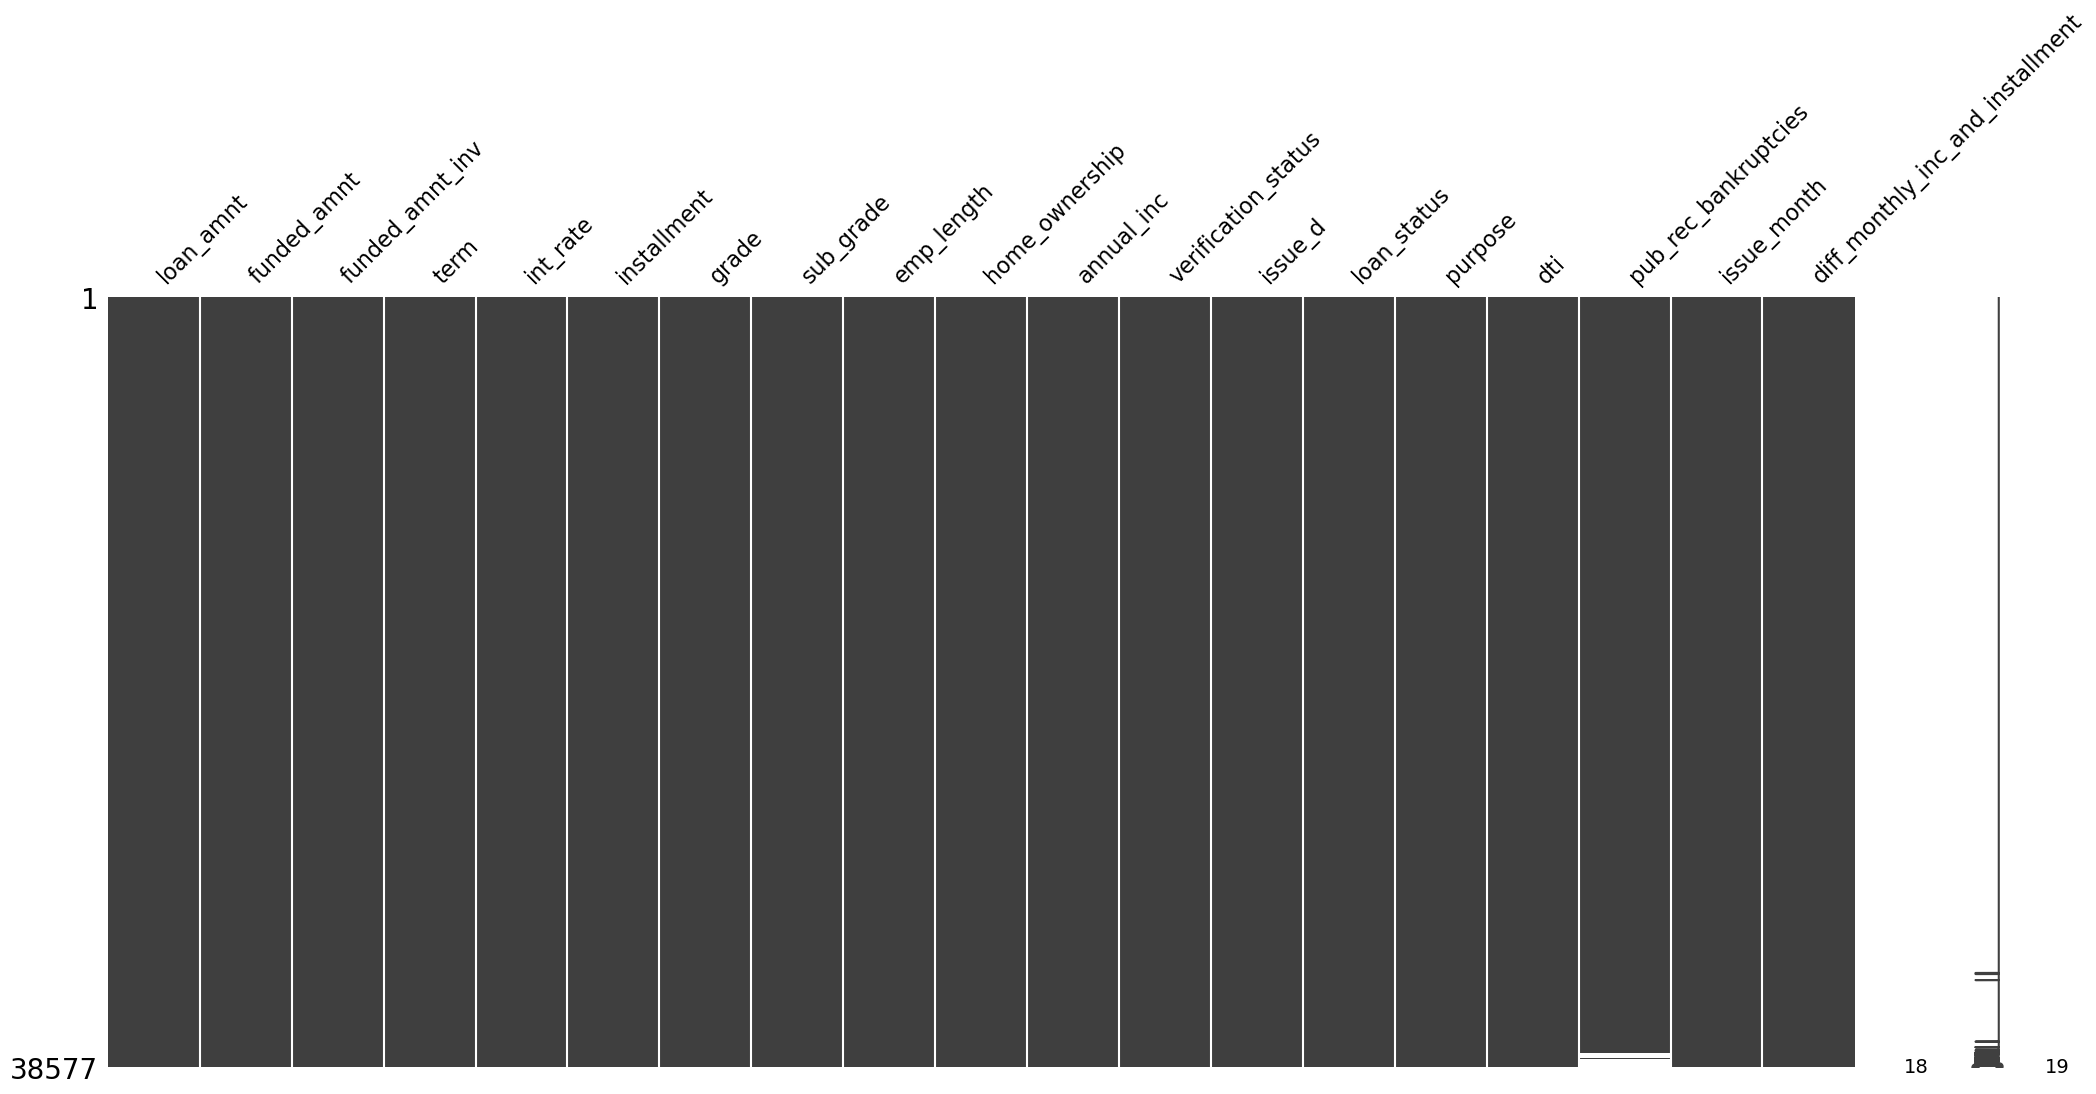

In [56]:
msno.matrix(loan)

### Here we see pub_rec_bankruptcies is the only column with null values.

In [73]:
loan.pub_rec_bankruptcies.isna().sum()

697

In [74]:
loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [76]:
# Check how data is where this value is missing and check if there is any dependency on any other column.
loan[loan.pub_rec_bankruptcies.isna()].head(20)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
35006      15000        15000     14875.000000    36      8.94       476.58   
35058       3000         3000      2988.236621    36     14.26       102.92   
35362       4000         4000      3892.258856    36     11.14       131.22   
38443       2300         2300       589.605658    36     13.17        77.69   
38717       6000         6000       500.000000    36      8.00       188.02   
38728       5000         2650       495.490000    36     11.34        87.19   
38876      10000        10000      8790.326481    36     13.55       339.60   
38971      15000        15000     13138.201850    36      8.63       474.42   
39004      10000        10000      8741.042410    36      9.45       320.10   
39005      12000        12000      6475.000000    36     13.55       407.52   
39006       5000         5000      3875.000000    36      9.45       160.05   
39007       6000         6000      4612.877971    36     13.55       203.76   
39008       9000         9000      3825.000000    36     10.08       290.75   
39009       4000         4000      2825.000000    36     10.08       129.22   
39010       1200         1200       875.000000    36      8.00        37.61   
39011       3500         3500      2817.200000    36      8.00       109.68   
39012       3000         3000      2375.000000    36      7.37        93.14   
39014      12000        12000      6721.352900    36     13.24       405.72   
39015       7000         7000      3250.000000    36     11.34       230.30   
39016       3500         3500      2937.550000    36     11.66       115.69   

      grade sub_grade  emp_length home_ownership  annual_inc  \
35006     A        A5           1       MORTGAGE    110000.0   
35058     C        C5           3       MORTGAGE     80800.0   
35362     B        B1           1       MORTGAGE     60000.0   
38443     D        D2          10           RENT     37152.0   
38717     A        A3           1       MORTGAGE     75000.0   
38728     C        C2          10       MORTGAGE     90000.0   
38876     D        D4           3           RENT    100000.0   
38971     A        A5          10            OWN     50000.0   
39004     B        B1           2           RENT     70000.0   
39005     D        D4           1       MORTGAGE     55000.0   
39006     B        B1           3           RENT     40000.0   
39007     D        D4          10           RENT     72000.0   
39008     B        B3           1           RENT     39000.0   
39009     B        B3          10       MORTGAGE     55200.0   
39010     A        A3           5           RENT     14800.0   
39011     A        A3           4           RENT     48562.0   
39012     A        A1          10       MORTGAGE     39504.0   
39014     D        D3           7           RENT     44160.0   
39015     C        C2           2            OWN     45000.0   
39016     C        C3           1           RENT     54263.0   

      verification_status    issue_d  loan_status             purpose    dti  \
35006        Not Verified 2009-09-01   Fully Paid         credit_card   7.07   
35058        Not Verified 2009-09-01   Fully Paid         credit_card  14.97   
35362        Not Verified 2009-08-01  Charged Off                 car  11.08   
38443            Verified 2008-08-01   Fully Paid              moving   2.26   
38717        Not Verified 2008-05-01   Fully Paid               other  16.08   
38728        Not Verified 2008-05-01   Fully Paid    home_improvement  17.25   
38876        Not Verified 2008-03-01   Fully Paid         credit_card   7.94   
38971        Not Verified 2008-03-01   Fully Paid               other   2.59   
39004        Not Verified 2008-03-01   Fully Paid         educational   9.38   
39005        Not Verified 2008-03-01   Fully Paid         credit_card  14.99   
39006        Not Verified 2008-03-01   Fully Paid         credit_card   5.97   
39007        Not Verified 2008-03-01   Ful

In [79]:
print(loan.term[loan.pub_rec_bankruptcies.isna()].value_counts())
print(loan.term.value_counts())

36    697
Name: term, dtype: int64
36    29096
60     9481
Name: term, dtype: int64


#### We can't say that pub_rec_bankruptcies has dependency on any column because of which we have null values in it. Its a MCAR(missing completely at random) category.

In [88]:
print("Mode: ",loan.pub_rec_bankruptcies.mode())
print("Median: ",loan.pub_rec_bankruptcies.median())
loan.pub_rec_bankruptcies.describe()

Mode:  0    0.0
Name: pub_rec_bankruptcies, dtype: float64
Median:  0.0


count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [91]:
loan.pub_rec_bankruptcies.skew()

4.523507497128528

### We can use Median for imputation as we see that the data is numeric and highly skewed. Also we had established that it belongs to MCAR category.

#### Identify the variables
Numeric Variables : loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month,installment,diff_monthly_inc_and_installment
<br>Categorial Variables: grade, sub_grade,home_ownership,verification_status,loan_status,purpose

# UniVariate

#### Count plot to show fully paid vs charged off loan

<Axes: xlabel='loan_status', ylabel='count'>

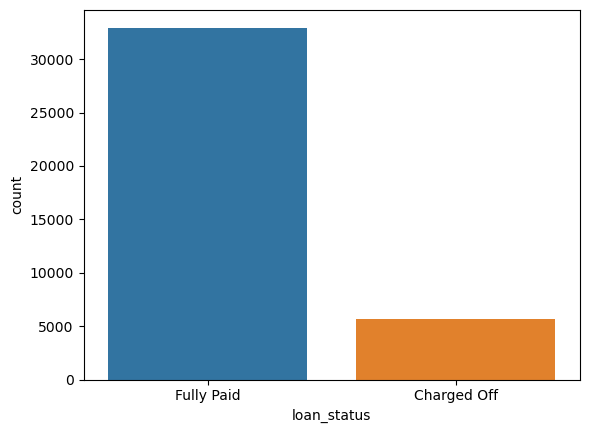

In [92]:
sns.countplot(x ='loan_status', data = loan)

#### Observation : Ratio of charged off loan is quite less compared to fully paid loan. Because of class imbalance we can see biases when we model our data.

#### Checking loan based on the grade

<Axes: xlabel='grade', ylabel='count'>

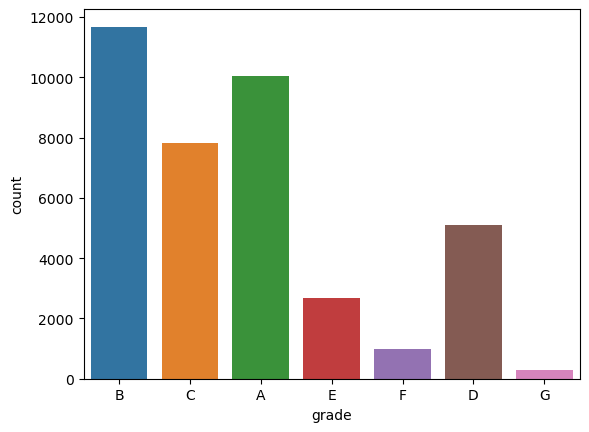

In [93]:
sns.countplot(x ='grade', data = loan)

#### Observation : max loan provided for grade B followed by grade A and C. We also observe that lower the grade less likely is the chance for it to get through.


#### Analyse Loan Amount

<Axes: xlabel='loan_amnt', ylabel='Count'>

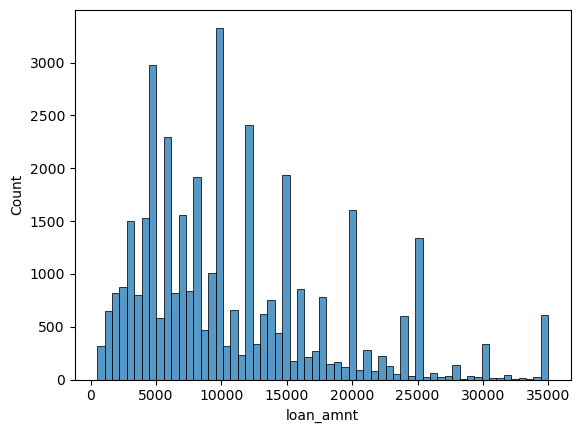

In [94]:
sns.histplot(x='loan_amnt', data = loan)

#### Observation : More loan is taken for the amount between 5000 and 15000

#### Analyse on purpose variable

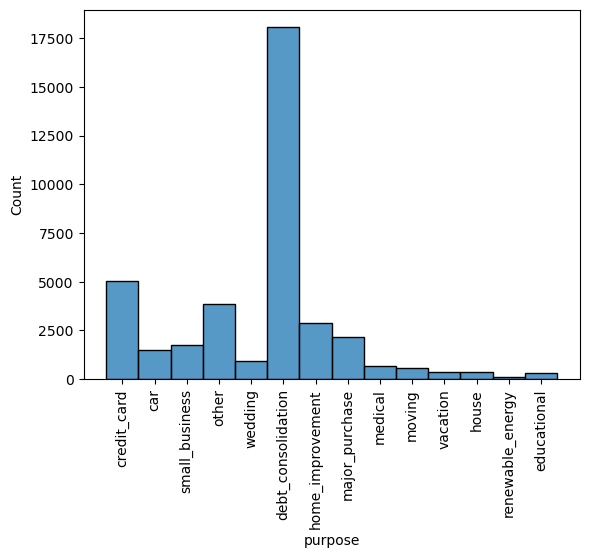

In [95]:
sns.histplot(x='purpose', data = loan)
plt.xticks(rotation = 90)
plt.show()

Observation : Max loan is taken for debt_consolidation

#### Analyse on annual_inc

In [96]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

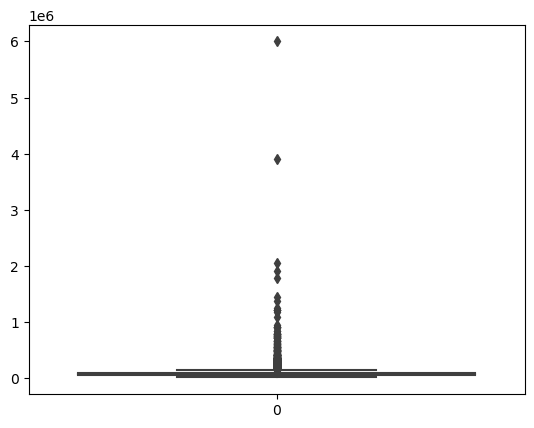

In [97]:
# Check for outliers
sns.boxplot(loan['annual_inc'])
plt.show()

In [98]:
# Calculate Inter Quantile Range
q1,q3 = loan['annual_inc'].quantile([0.25,0.75])
iqr = q3-q1
print("Inter Quantile Range:",iqr)

Inter Quantile Range: 42000.0


In [99]:
# Check for upper and lower bound
lower_bound = q1-(1.5*iqr) 
upper_bound = q3+(1.5*iqr)
print("lower-bound",lower_bound)
print("upper-bound",upper_bound)

lower-bound -23000.0
upper-bound 145000.0


In [100]:
loan.shape

(38577, 19)

In [101]:
#considering only the upper bound as lower bound is negative
loan_aft_annual_inc_outlier_removal = loan[~(loan['annual_inc']>upper_bound)]

In [102]:
loan_aft_annual_inc_outlier_removal.shape

(36815, 19)

In [109]:
loan.verification_status[(loan['annual_inc']>upper_bound)].value_counts()

Verified           906
Source Verified    482
Not Verified       374
Name: verification_status, dtype: int64

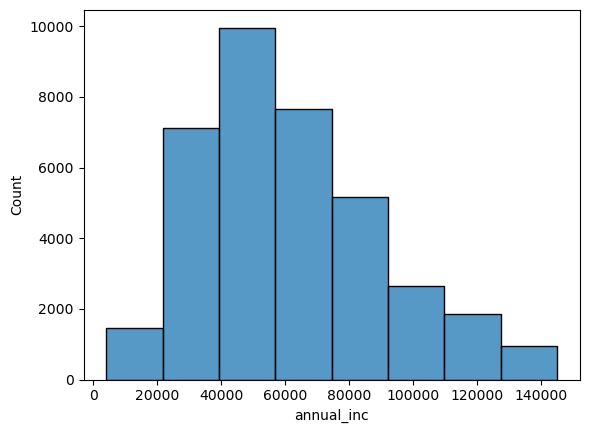

In [103]:
sns.histplot(loan_aft_annual_inc_outlier_removal['annual_inc'], bins =8)
plt.show()

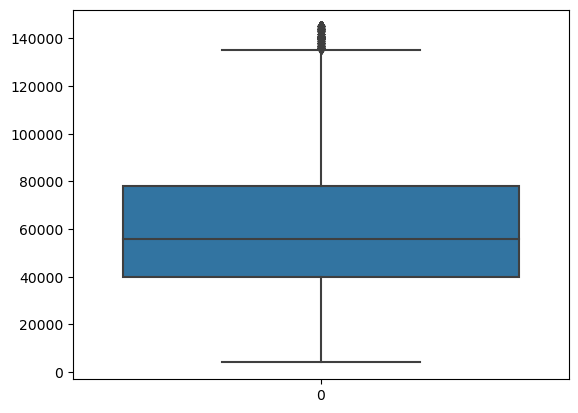

In [104]:
sns.boxplot(loan_aft_annual_inc_outlier_removal['annual_inc'])
plt.show()

Observation :<br>
Annual income range from 40000 to 80000 after removing outliers.
Without the removal it ranges from 40000 to 82000. Also we see that most of the outliers verification status is verified or source verified. So its better to not remove them from main data.

#### Analyse on home_ownership

<Axes: xlabel='home_ownership', ylabel='count'>

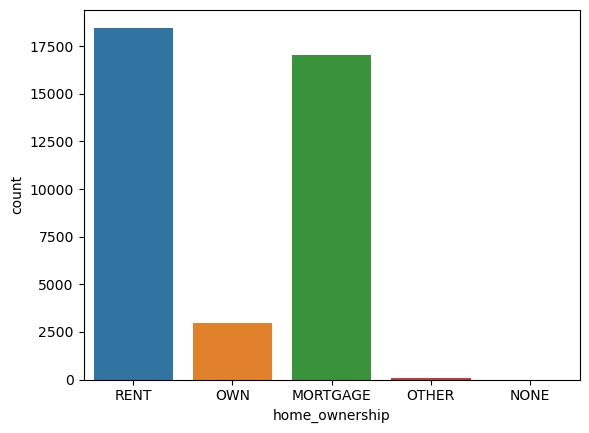

In [110]:
sns.countplot(x ='home_ownership', data = loan)

#### Observation : people who are owning the home have taken less loans. home_ownership with "RENT" and "MORTAGE" have taken more loan

#### Analyse on issue_d

<Axes: xlabel='issue_year', ylabel='count'>

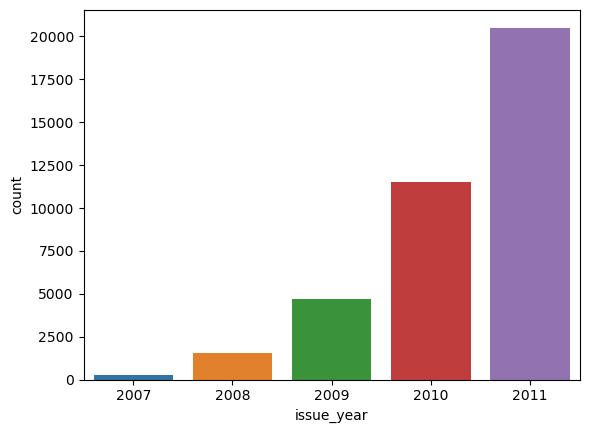

In [115]:
# Analyse based on year
sns.countplot(x ='issue_year', data = loan)

<Axes: xlabel='issue_month', ylabel='count'>

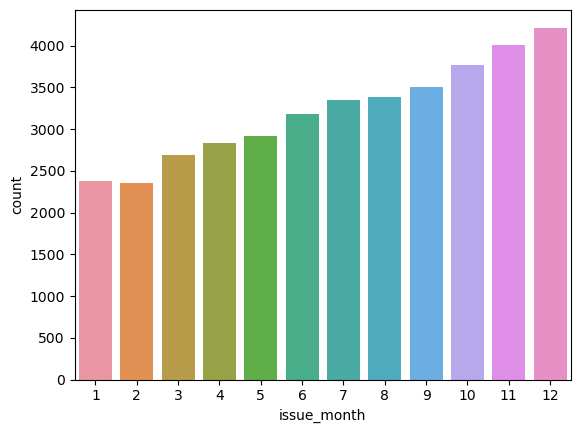

In [116]:
# Analyse based on month
sns.countplot(x ='issue_month', data = loan)

Observation : We see that there is a gradual increase in the number of loans given year on year which may state that the company's health is good.
We also observe that more loans are granted in 4 quater. And a growing pattern is seen as we get closer to year end. Possible reasons could be interest rates changes or retailers or individuals making end-of-the-year or first-of-the-year investments to gain tax advantages.

#### Analyse on emp_length

<Axes: xlabel='emp_length', ylabel='count'>

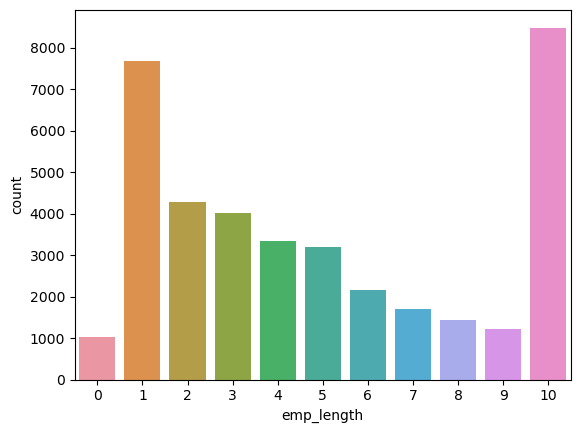

In [118]:
# Analyse based on emp_length
sns.countplot(x ='emp_length', data = loan)

Observation : People who have completed one year in their jobs or people who have been employed for more then 10+ years are the people who tend to take most loans.
It will be interesting to see what people with one year of experience like to take loan for and also what people who have been working for more than 10 years.

#### Analyse on pub_rec_bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

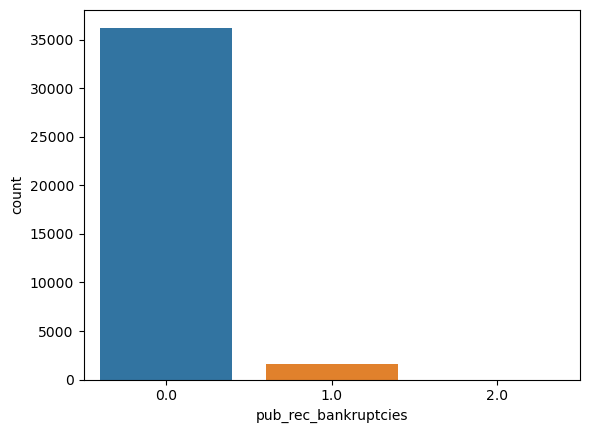

In [178]:
# Analyse based on pub_rec_bankruptcies
sns.countplot(x ='pub_rec_bankruptcies', data = loan)

In [182]:
loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Observation : As there is not much diversification in the values and 93% of them have same value. It is not a good variable to consider for analysis.

# Segmented UniVariate

In [120]:
loan.head(2)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0       5000         5000           4975.0    36     10.65       162.87     B   
1       2500         2500           2500.0    60     15.27        59.83     C   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           1           RENT     30000.0     Source Verified   

     issue_d  loan_status      purpose    dti  pub_rec_bankruptcies  \
0 2011-12-01   Fully Paid  credit_card  27.65                   0.0   
1 2011-12-01  Charged Off          car   1.00                   0.0   

   issue_month  diff_monthly_inc_and_installment  issue_year  
0           12                           1837.13        2011  
1           12                           2440.17        2011

## Analysis of int_rate w.r.t home_ownership, grade, term, issue_month, emp_length, loan_status

<Axes: xlabel='home_ownership', ylabel='int_rate'>

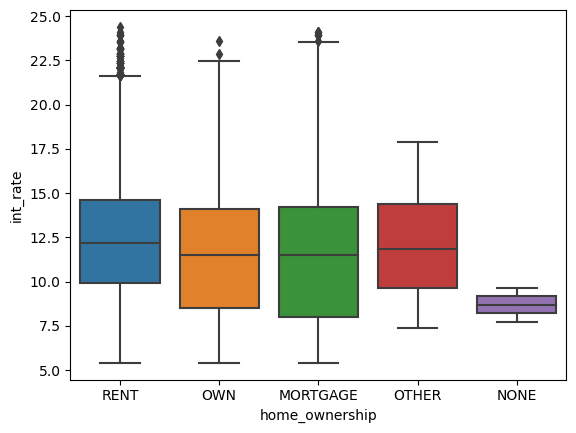

In [121]:
# int_rate vs home_ownership
sns.boxplot(x='home_ownership', y='int_rate', data=loan)

<Axes: xlabel='grade', ylabel='int_rate'>

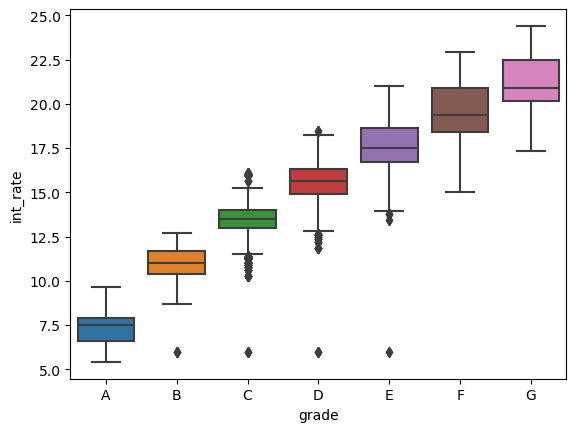

In [134]:
# int_rate vs grade
sns.boxplot(x=loan.grade.sort_values(), y='int_rate', data=loan)

<Axes: xlabel='term', ylabel='int_rate'>

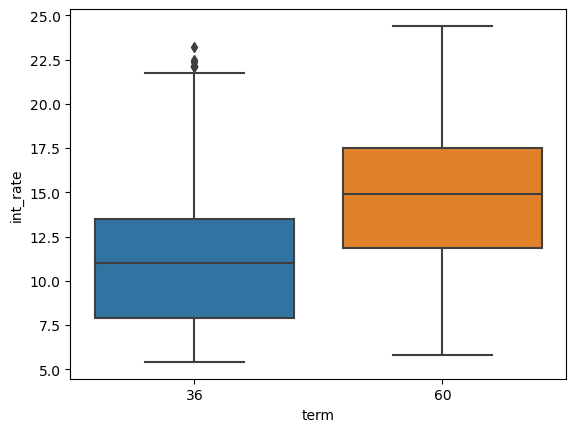

In [123]:
# int_rate vs term
sns.boxplot(x='term', y='int_rate', data=loan)

<Axes: xlabel='issue_month', ylabel='int_rate'>

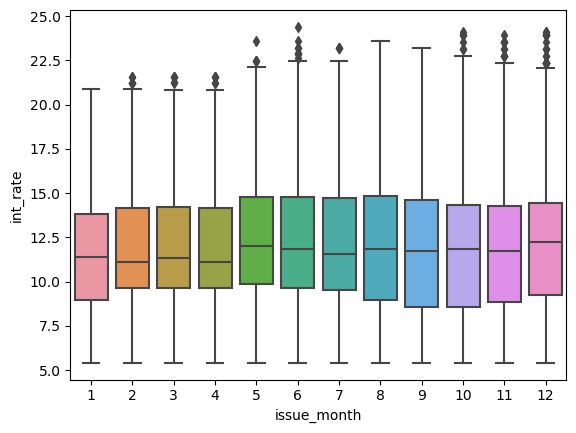

In [124]:
# int_rate vs issue_mont
sns.boxplot(x='issue_month', y='int_rate', data=loan)

<Axes: xlabel='emp_length', ylabel='int_rate'>

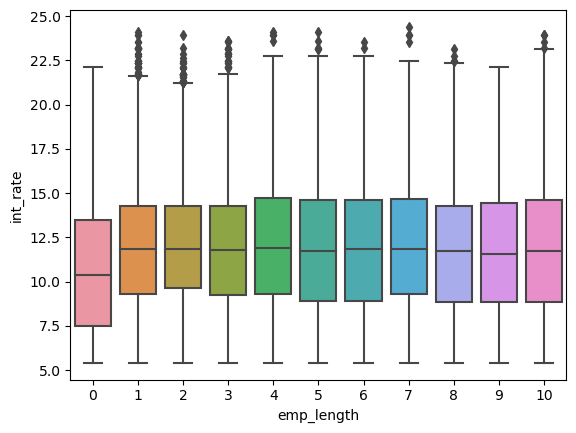

In [125]:
# int_rate vs emp_length
sns.boxplot(x='emp_length', y='int_rate', data=loan)

<Axes: xlabel='loan_status', ylabel='int_rate'>

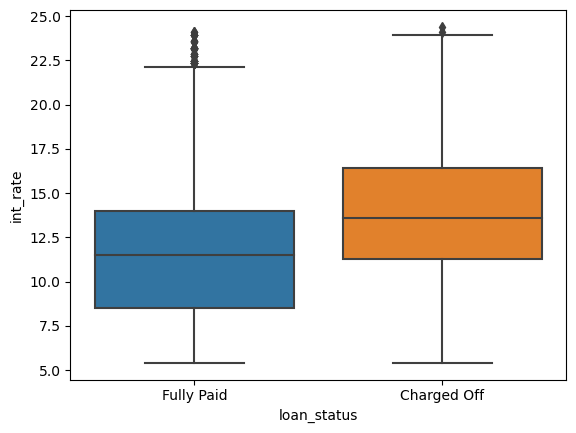

In [126]:
# int_rate vs loan_status
sns.boxplot(x='loan_status', y='int_rate', data=loan)

## Observation for int_rate:
<b>against home_ownership</b> - We see its not affecting interest rate much as the median remains same across. </br>
<b>against grade</b> - We see that as the grade increases so does the interest rate. Its kind of understandable also as these grades are defined by LC. </br>
<b>against term</b> - We see that Interquartile range for 60 months is more than the median for 36 months. So its fair to assume that interest rates are more when loan is requested for longer term. </br>
<b>against issue_month</b> - Though we see median is not much varied across the months. But 25% is lowest for September, october, November. So we can assume some of the loans with best interest rates are given during 4 quater of the year. This also proves that interest rate can be one of the factors why more loans are given in october and November. </br>
<b>against emp_length</b> - Mostly the data looks same across except for ones which have less than 1 year experience. So we could say that people who are unemployed or have less than 1 year of experience are given loan at very less interest rate. But we should also remember from past graph that not much people belonging to this category get a loan approved. </br>
<b>against loan_status</b> - We see that people who charged off had 25% almost similar to the median of the people who fully paid. But we can't say that its because people people with higher interest rate default. Because we keep higher interest rate for people who we think might default.

## Analysis of funded_amnt_inv w.r.t home_ownership, grade, term, issue_year, emp_length, loan_status

<Axes: xlabel='home_ownership', ylabel='funded_amnt_inv'>

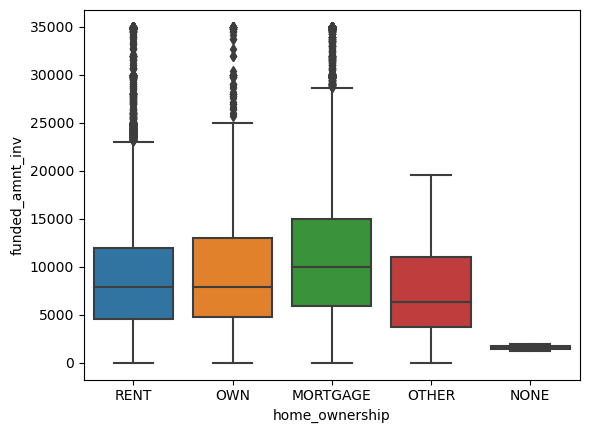

In [128]:
# funded_amnt_inv vs home_ownership
sns.boxplot(x='home_ownership', y='funded_amnt_inv', data=loan)

<Axes: xlabel='grade', ylabel='funded_amnt_inv'>

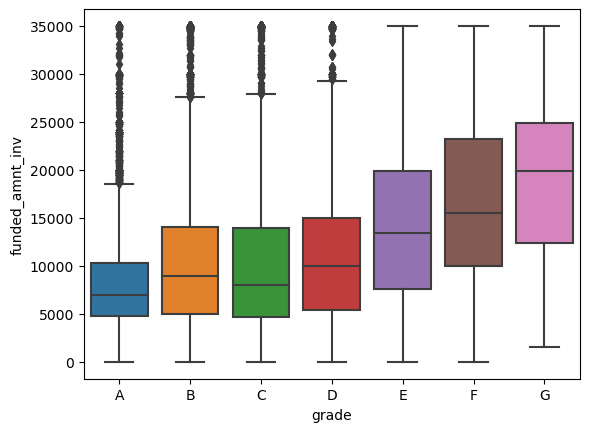

In [133]:
# funded_amnt_inv vs grade
sns.boxplot(x=loan.grade.sort_values(), y='funded_amnt_inv', data=loan)

<Axes: xlabel='term', ylabel='funded_amnt_inv'>

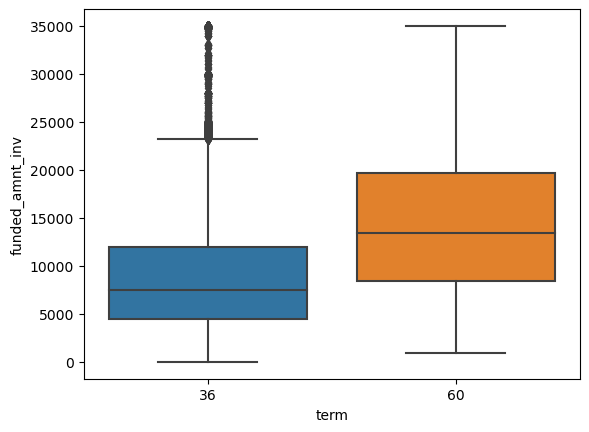

In [135]:
# funded_amnt_inv vs term
sns.boxplot(x='term', y='funded_amnt_inv', data=loan)

<Axes: xlabel='issue_year', ylabel='funded_amnt_inv'>

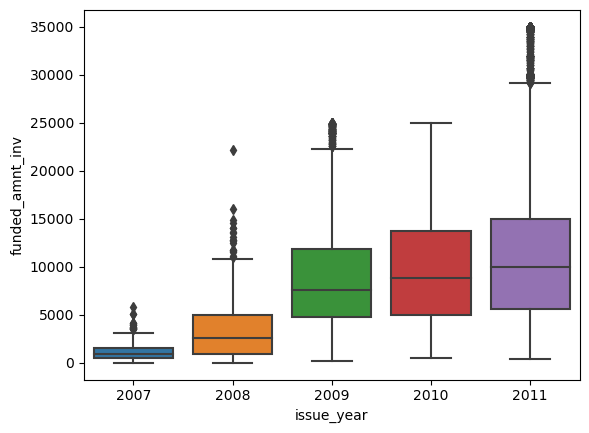

In [137]:
# funded_amnt_inv vs issue_year
sns.boxplot(x='issue_year', y='funded_amnt_inv', data=loan)

<Axes: xlabel='emp_length', ylabel='funded_amnt_inv'>

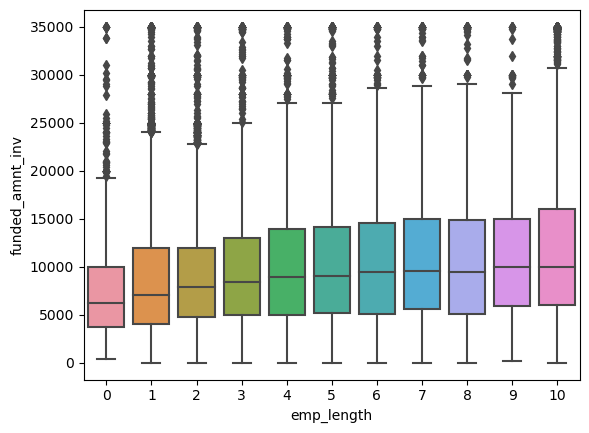

In [143]:
# funded_amnt_inv vs emp_length
sns.boxplot(x='emp_length', y='funded_amnt_inv', data=loan)

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

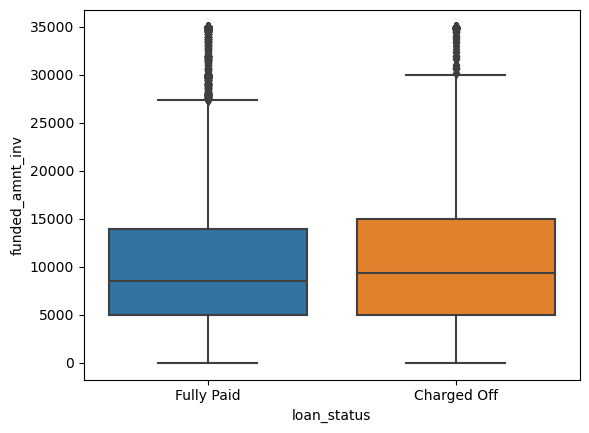

In [141]:
# funded_amnt_inv vs loan_status
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=loan)

## Observation for funded_amnt_inv:
<b>against home_ownership</b> - We see people with mortgage tend to request for higher amounts. </br>
<b>against grade</b> - We see that there is a significant increase in the size of IQR for Grade E,F,G. This could mean that these people tend to request for wide range of funded amount. </br>
<b>against term</b> - Higher funded amounts tends to have longer tenure. </br>
<b>against issue_year</b> - We see that year on year there is a good increase in the funded amounts and also diversified loan amounts are granted. </br>
<b>against emp_length</b> - We see a slight increase around the median and also significant increase around 75%. This suggests that the higher the employee experience, more is their risk taking appetite. </br>
<b>against loan_status</b> - Not much insightful.

## Analysis of DTI(debt to income ratio) w.r.t grade, issue_year, loan_status, purpose

<Axes: xlabel='grade', ylabel='dti'>

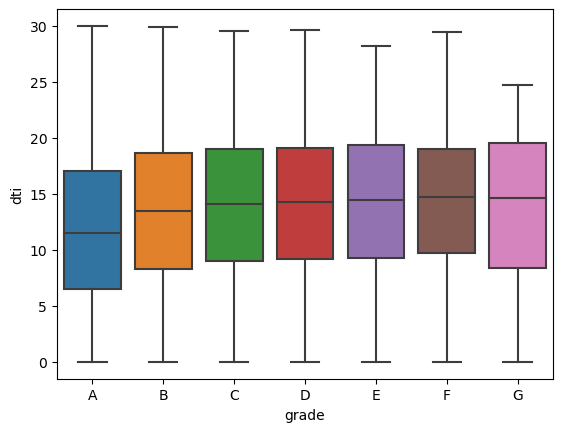

In [146]:
# dti vs grade
sns.boxplot(x=loan.grade.sort_values(), y='dti', data=loan)

<Axes: xlabel='issue_year', ylabel='dti'>

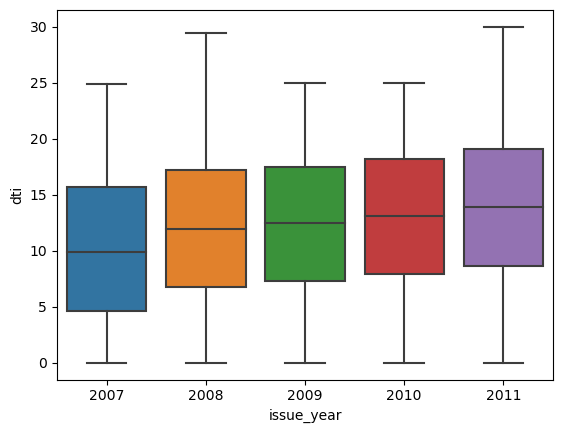

In [148]:
# dti vs issue_year
sns.boxplot(x='issue_year', y='dti', data=loan)

<Axes: xlabel='loan_status', ylabel='dti'>

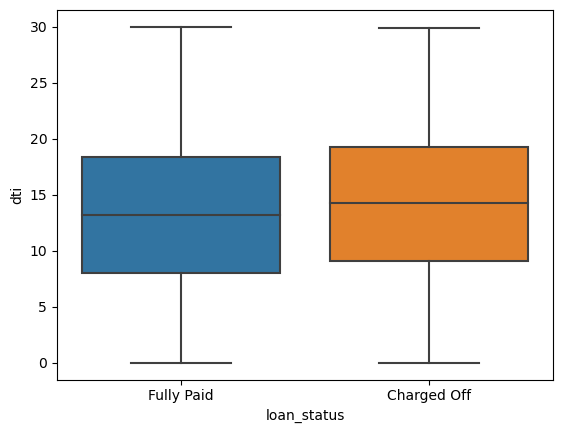

In [151]:
# dti vs loan_status
sns.boxplot(x='loan_status', y='dti', data=loan)

<Axes: xlabel='purpose', ylabel='dti'>

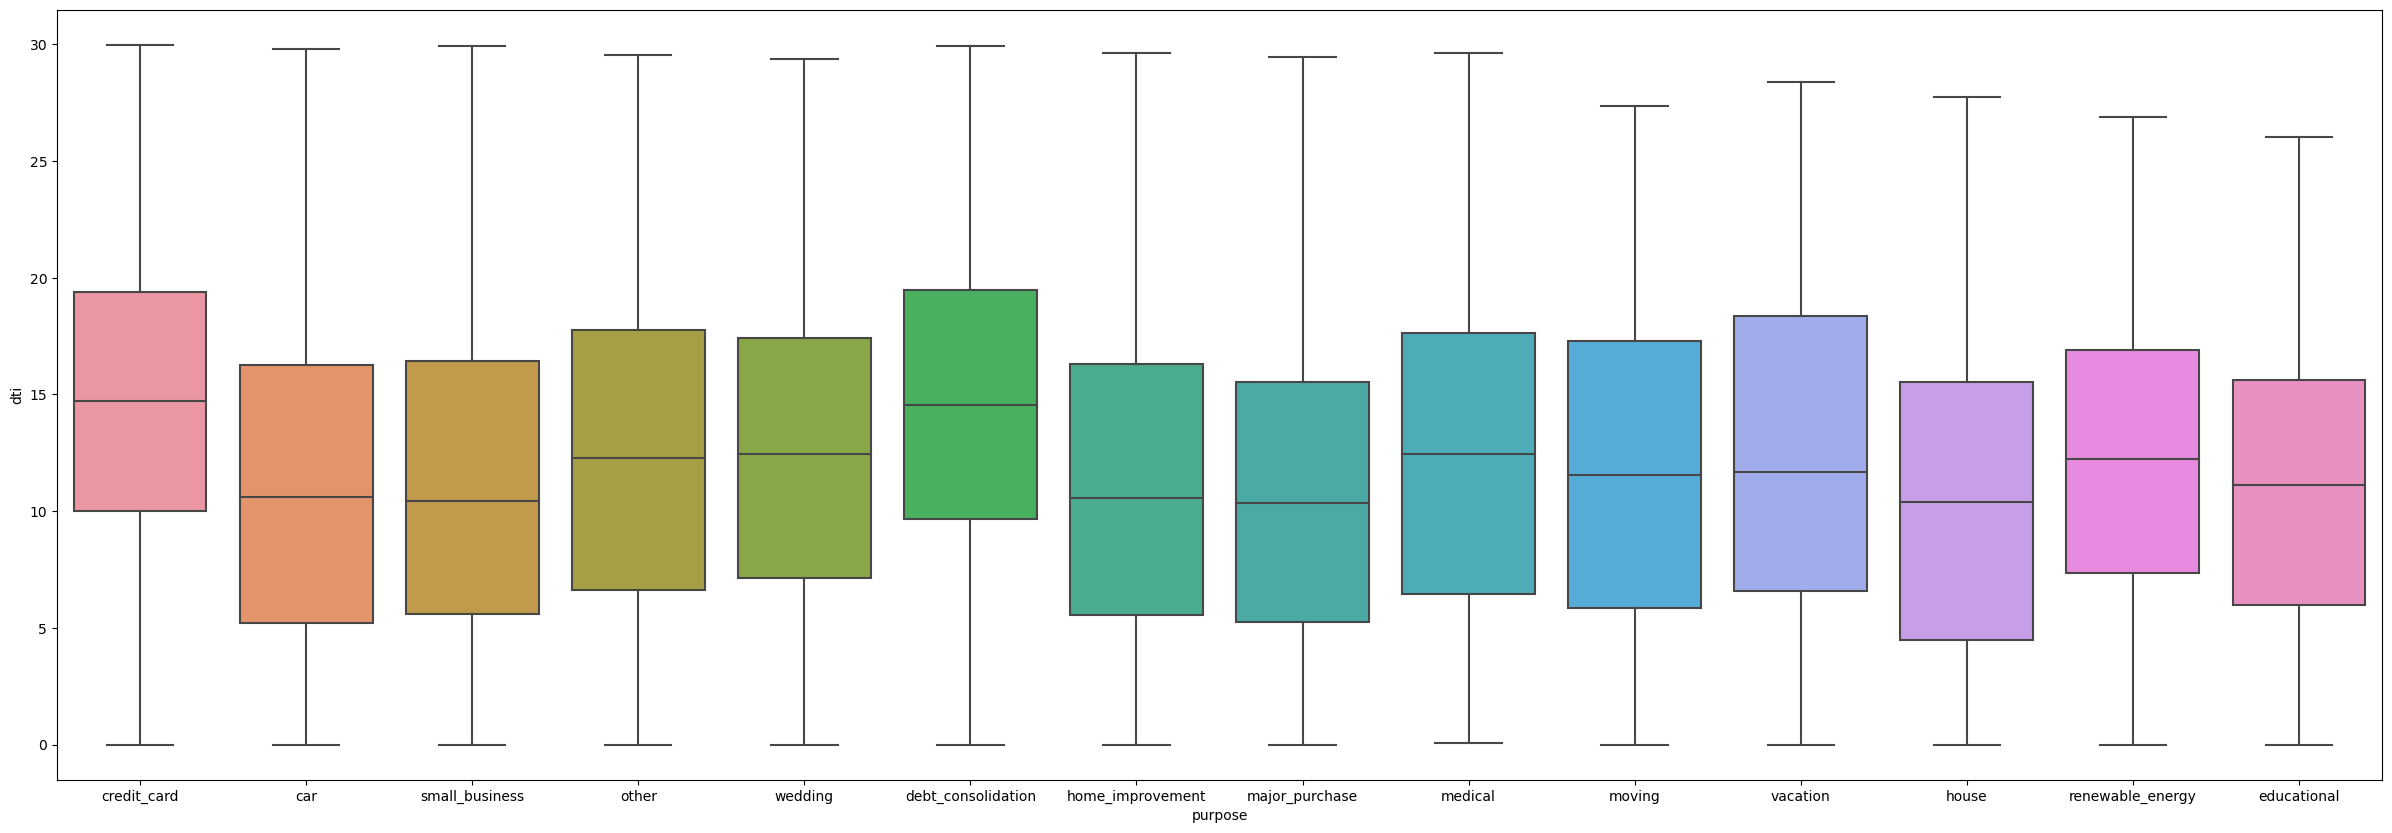

In [154]:
# dti vs purpose
plt.figure(figsize=(30,10))
sns.boxplot(x='purpose', y='dti', data=loan)

## Observation for DTI:
<b>against grade</b> - We see that grade A has lower DTI compared to the rest. Lower the DTI, lower the chance of person defaulting. </br>
<b>against issue_year</b> - We see DTI has increased over time for people requesting for loan. This is an indication of people relying more on loans now than in earlier times. </br>
<b>against loan_status</b> - We see people with higher DTI have higher probability to default. </br>
<b>against purpose</b> - If the purpose to take the loan was credit card, debt_consolidation or vacation we observe higher DTI. Comparison done based on 50% and 75%.

## Analysis of diff_monthly_inc_and_installment w.r.t home_ownership, grade, term, issue_year, emp_length, loan_status,purpose

In [158]:
loan['diff_monthly_inc_and_installment'].describe()

count     38577.000000
mean       5409.031489
std        5299.488271
min         252.020000
25%        3138.640000
50%        4524.776667
75%        6471.980000
max      499832.160000
Name: diff_monthly_inc_and_installment, dtype: float64

<Axes: >

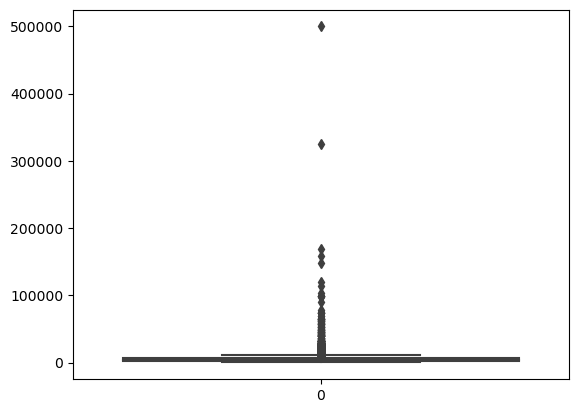

In [159]:
# Check for outliers
sns.boxplot(loan['diff_monthly_inc_and_installment'])

In [160]:
# Calculate Inter Quantile Range
q1,q3 = loan['diff_monthly_inc_and_installment'].quantile([0.25,0.75])
iqr = q3-q1
print("Inter Quantile Range:",iqr)
print("q1:",q1)
print("q3:",q3)

Inter Quantile Range: 3333.3399999999997
q1: 3138.64
q3: 6471.98


In [161]:
# Check for upper and lower bound
lower_bound = q1-(1.5*iqr) 
upper_bound = q3+(1.5*iqr)
print("lower-bound",lower_bound)
print("upper-bound",upper_bound)

lower-bound -1861.3699999999994
upper-bound 11471.989999999998


In [162]:
#considering only the upper bound as lower bound is negative
loan_aft_diff_monthly_inc_and_installment_outlier_removal = loan[~(loan['diff_monthly_inc_and_installment']>upper_bound)]

<Axes: >

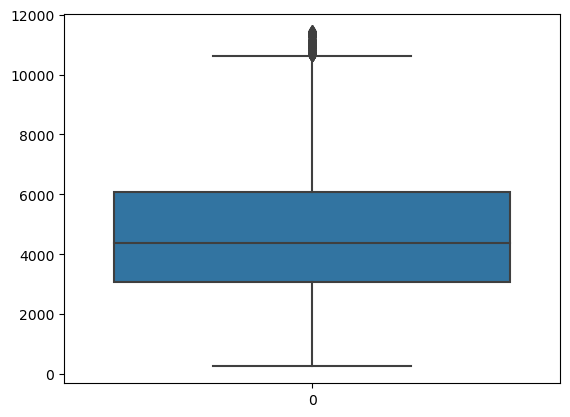

In [163]:
sns.boxplot(loan_aft_diff_monthly_inc_and_installment_outlier_removal['diff_monthly_inc_and_installment'])

#### Not changing the existing dataframe because even for these outliars except this column and annual_inc rest all looks fine. Hence not changing the actual Loan data. But will use `loan_aft_diff_monthly_inc_and_installment_outlier_removal` for this univariate analysis.

<Axes: xlabel='loan_status', ylabel='diff_monthly_inc_and_installment'>

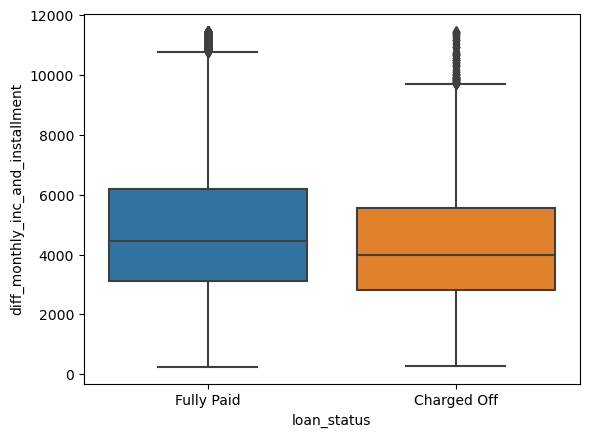

In [168]:
# diff_monthly_inc_and_installment vs loan_status
sns.boxplot(x='loan_status', y='diff_monthly_inc_and_installment', data=loan_aft_diff_monthly_inc_and_installment_outlier_removal)

<Axes: xlabel='verification_status', ylabel='diff_monthly_inc_and_installment'>

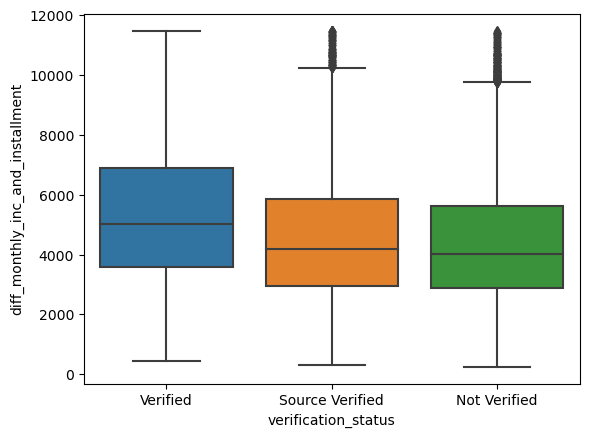

In [173]:
# diff_monthly_inc_and_installment vs verification_status
sns.boxplot(x='verification_status', y='diff_monthly_inc_and_installment', data=loan_aft_diff_monthly_inc_and_installment_outlier_removal)

## Observation for diff_monthly_inc_and_installment:
<b>against loan_status</b> - Here we see people with even less difference between monthly_inc and installments are categorized as chargeoffs. But this conclusion doesn't establish anything because the income stated could be false or one might have more debts which are not considered here. </br>
<b>against verification_status</b> - We observe that for verified ones the difference is more. But as these are verified based on the payslip and tax receipts given by borrower themselves they could be fake too. Hence would like to further analyse this section with loan status. </br>

C:\Users\I334253\AppData\Local\Temp\ipykernel_29848\68706643.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loan_verified = loan_aft_diff_monthly_inc_and_installment_outlier_removal[loan.verification_status == 'Verified']


<Axes: xlabel='loan_status', ylabel='diff_monthly_inc_and_installment'>

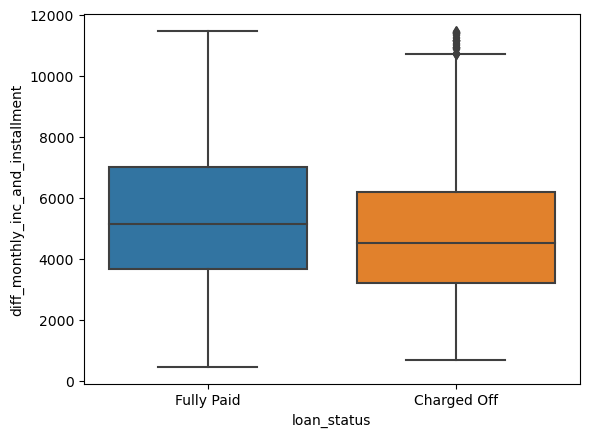

In [189]:
loan_verified = loan_aft_diff_monthly_inc_and_installment_outlier_removal[loan.verification_status == 'Verified']
sns.boxplot(x='loan_status', y='diff_monthly_inc_and_installment', data=loan_verified)

Observation: Seems when difference is more the chances of loan getting fully paid also increases. But can't establish it as a fact as there might be more hidden factors affecting this outcome.

# BiVariate

### Analyse loan_status and purpose

In [195]:
tab = pd.crosstab(loan.purpose, loan.loan_status)
tab

loan_status         Charged Off  Fully Paid
purpose                                    
car                         160        1339
credit_card                 542        4485
debt_consolidation         2767       15288
educational                  56         269
home_improvement            347        2528
house                        59         308
major_purchase              222        1928
medical                     106         575
moving                       92         484
other                       633        3232
renewable_energy             19          83
small_business              475        1279
vacation                     53         322
wedding                      96         830

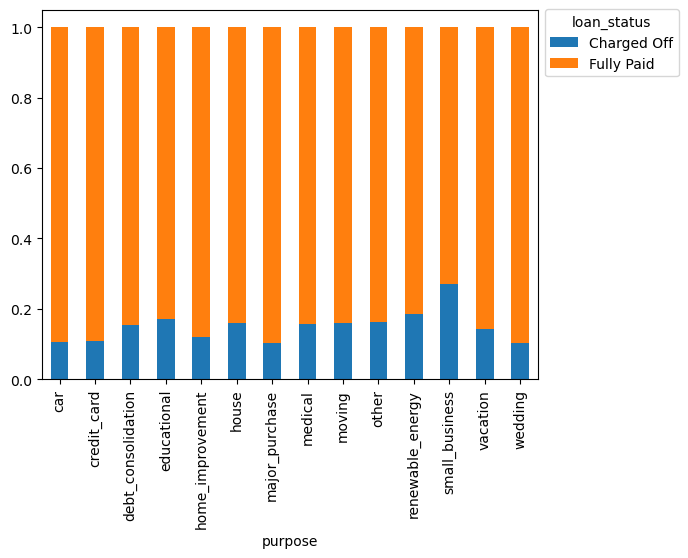

In [206]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true').legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')

## Observation
Highest percentage of chargeoffs are seen in case of small_business. It shows this is the risky one and proper analysis should be done about the borrower before approving loan for small_business purpose.

### Analyse loan_status and home_ownership

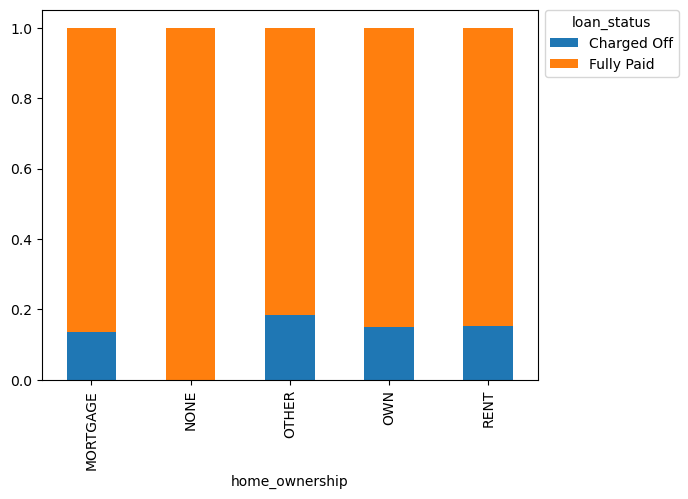

In [207]:
tab = pd.crosstab(loan.home_ownership, loan.loan_status)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true').legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')

## Observation
Other category is slightly high but that doesn't contribute much to establish anything.

### Analyse loan_status and term

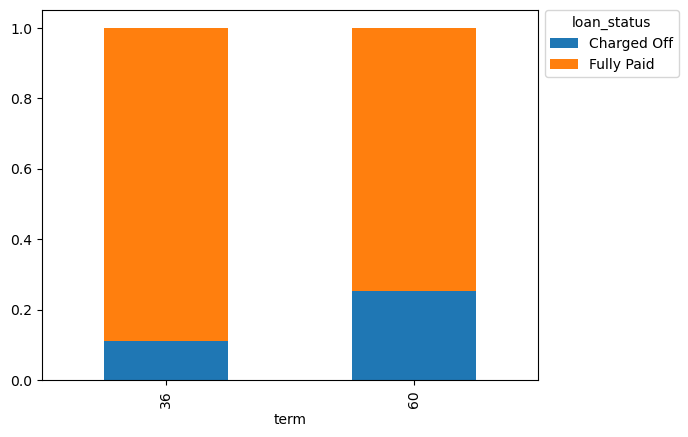

In [208]:
tab = pd.crosstab(loan.term, loan.loan_status)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true').legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')

## Observation
Here we observe that borrowers with longer tenure to payback loan tend to default more. Hence the higher interest rate for 60 month term like we observed earlier.

### Analyse loan_status and grade

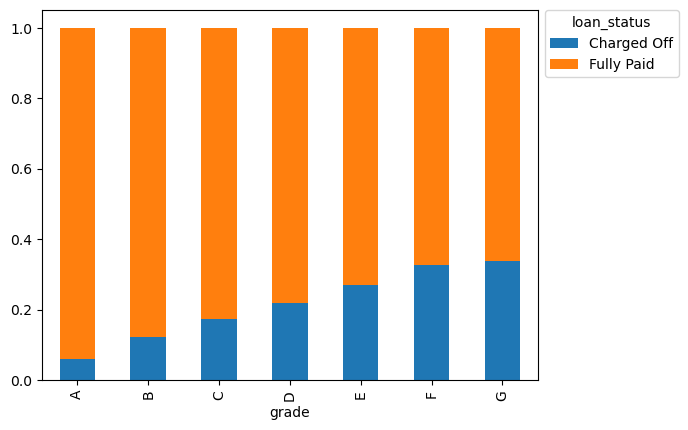

In [209]:
tab = pd.crosstab(loan.grade, loan.loan_status)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true').legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')

## Observation
As we move up the grade we see the chances of loan resulting in default also increases. Hence people with grade A,B,C should be given loans easily. But if someone from grade E,F,G asks for loan thorough background check and analyses should be done and and also higher interest rate should be set.

### Analyse loan_status and verification_status

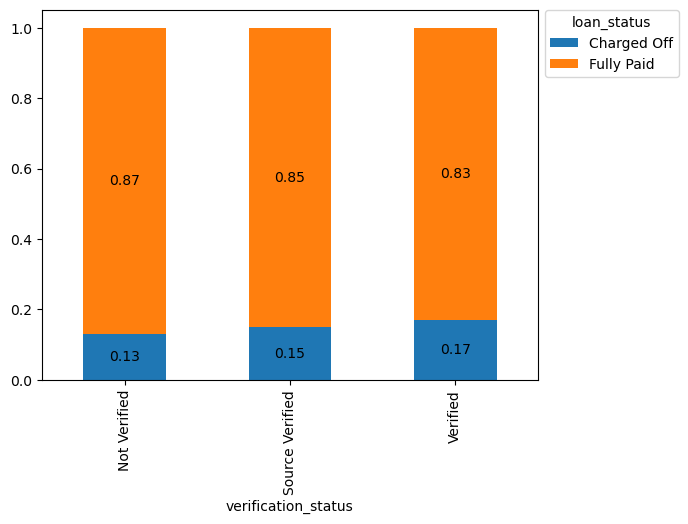

In [217]:
tab = pd.crosstab(loan.verification_status, loan.loan_status)
ax=tab.div(tab.sum(1).astype(float), axis=0).round(2).plot(kind='bar', stacked='true')
ax.legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

## Observation
We observe that people who were verified are likely to default more. Reason could be that some of the time verification is done after the loan is passed or even for testing and analysing purpose hence its not strongly affecting if the borrower would default.

### Analyse loan_status and emp_length

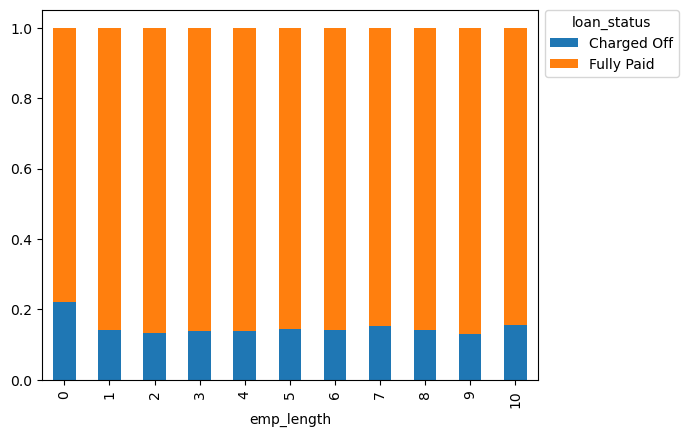

In [218]:
tab = pd.crosstab(loan.emp_length, loan.loan_status)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked='true').legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')

## Observation
Here we see that people who are unemployed or haven't completed 1 year of employment yet are more likely to default. Hence approver should be cautious when approving their loan request.

### Analyse loan_status and issue_month

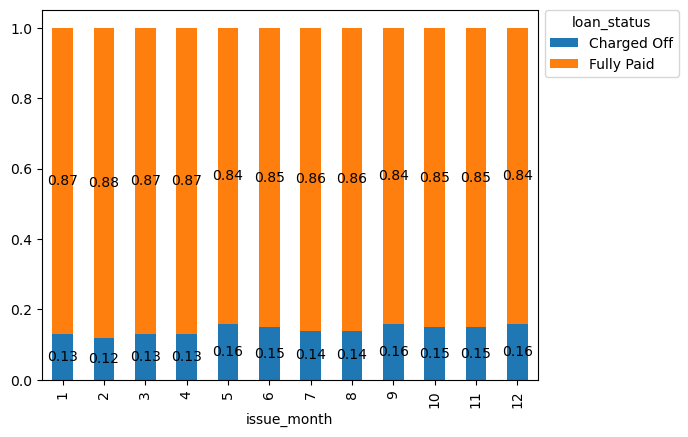

In [222]:
tab = pd.crosstab(loan.issue_month, loan.loan_status)
ax=tab.div(tab.sum(1).astype(float), axis=0).round(2).plot(kind='bar', stacked='true')
ax.legend(title='loan_status', bbox_to_anchor=(1, 1.02), loc='upper left')
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

## Observation
There is a slight higher percentage of chargeoffs in months june, sept and dec.

### Analyse funded_amnt_inv and purpose

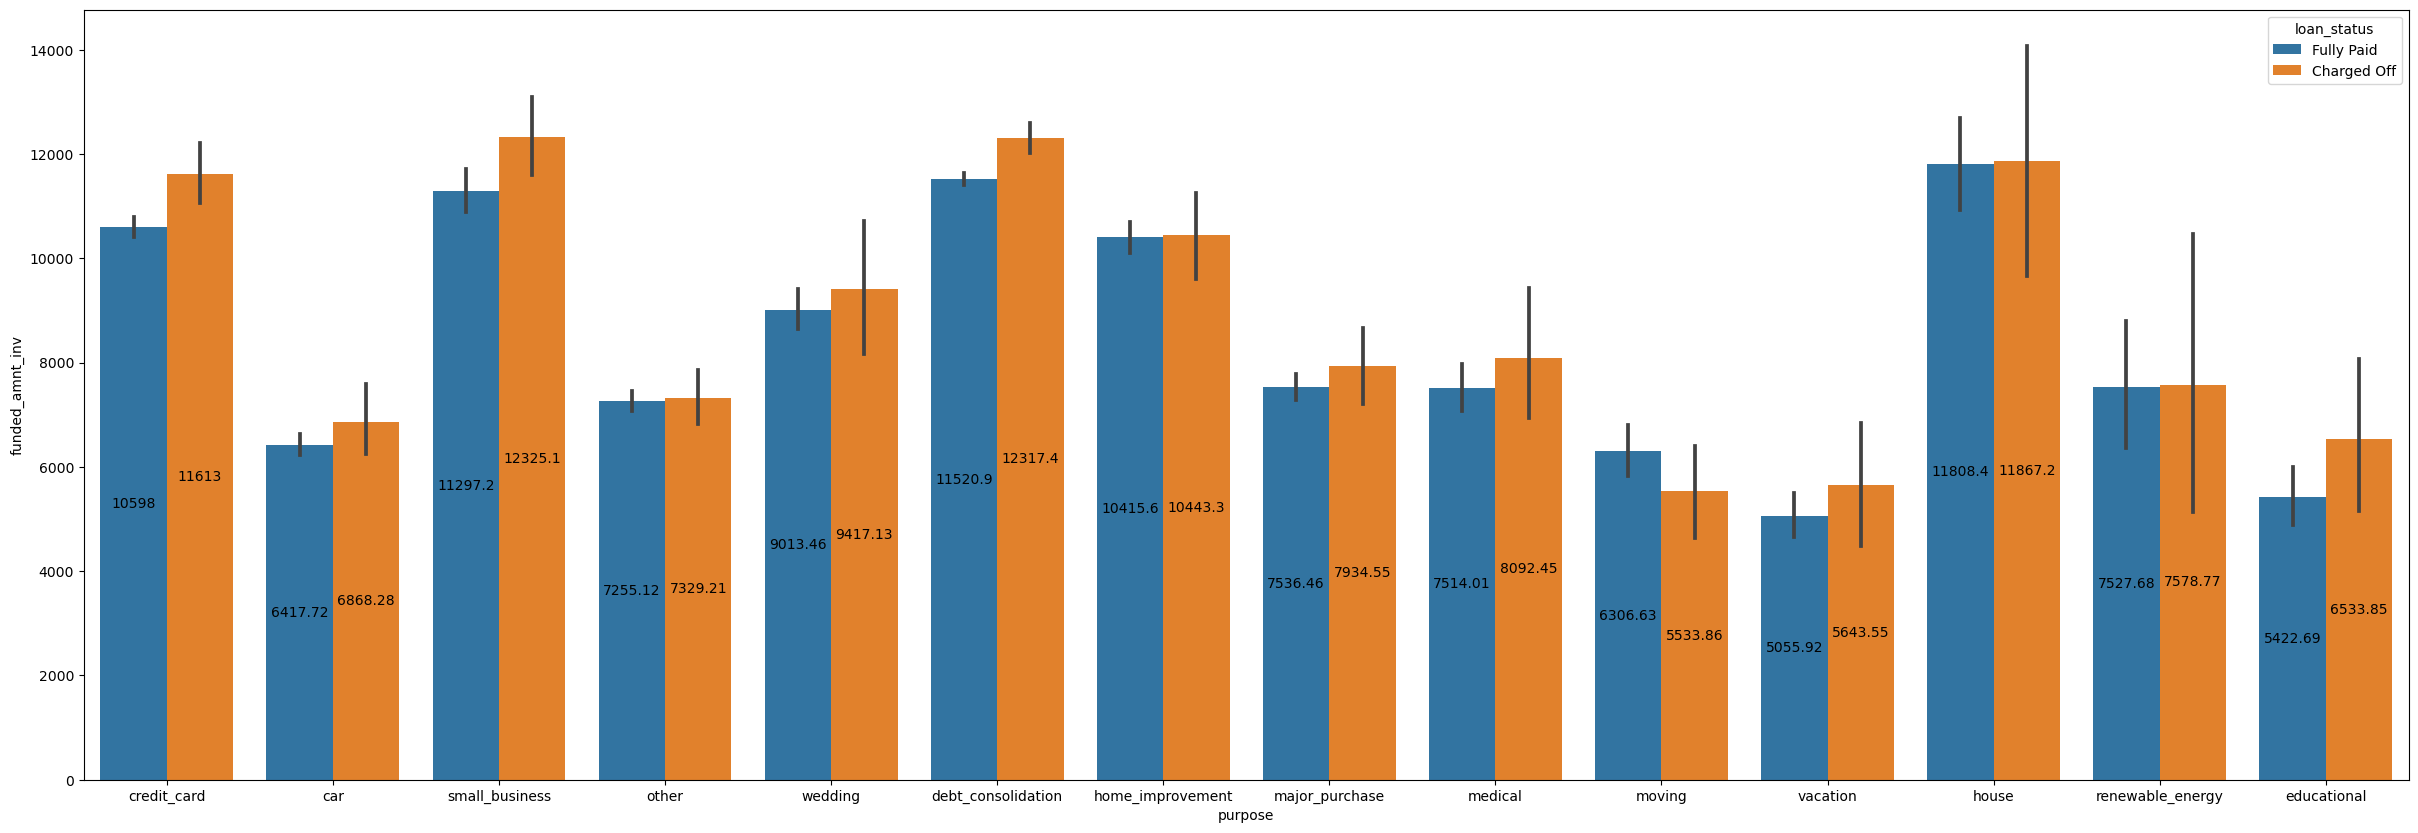

In [248]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='purpose', y='funded_amnt_inv', hue='loan_status', data= loan)
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

## Observation
We see loans taken for home improvement, moving, house and renewable energy are most likely to be fully paid. Whereas loans taken for education, debt consolidation and credit card are more likely to default.

### Analyse annual_inc and purpose

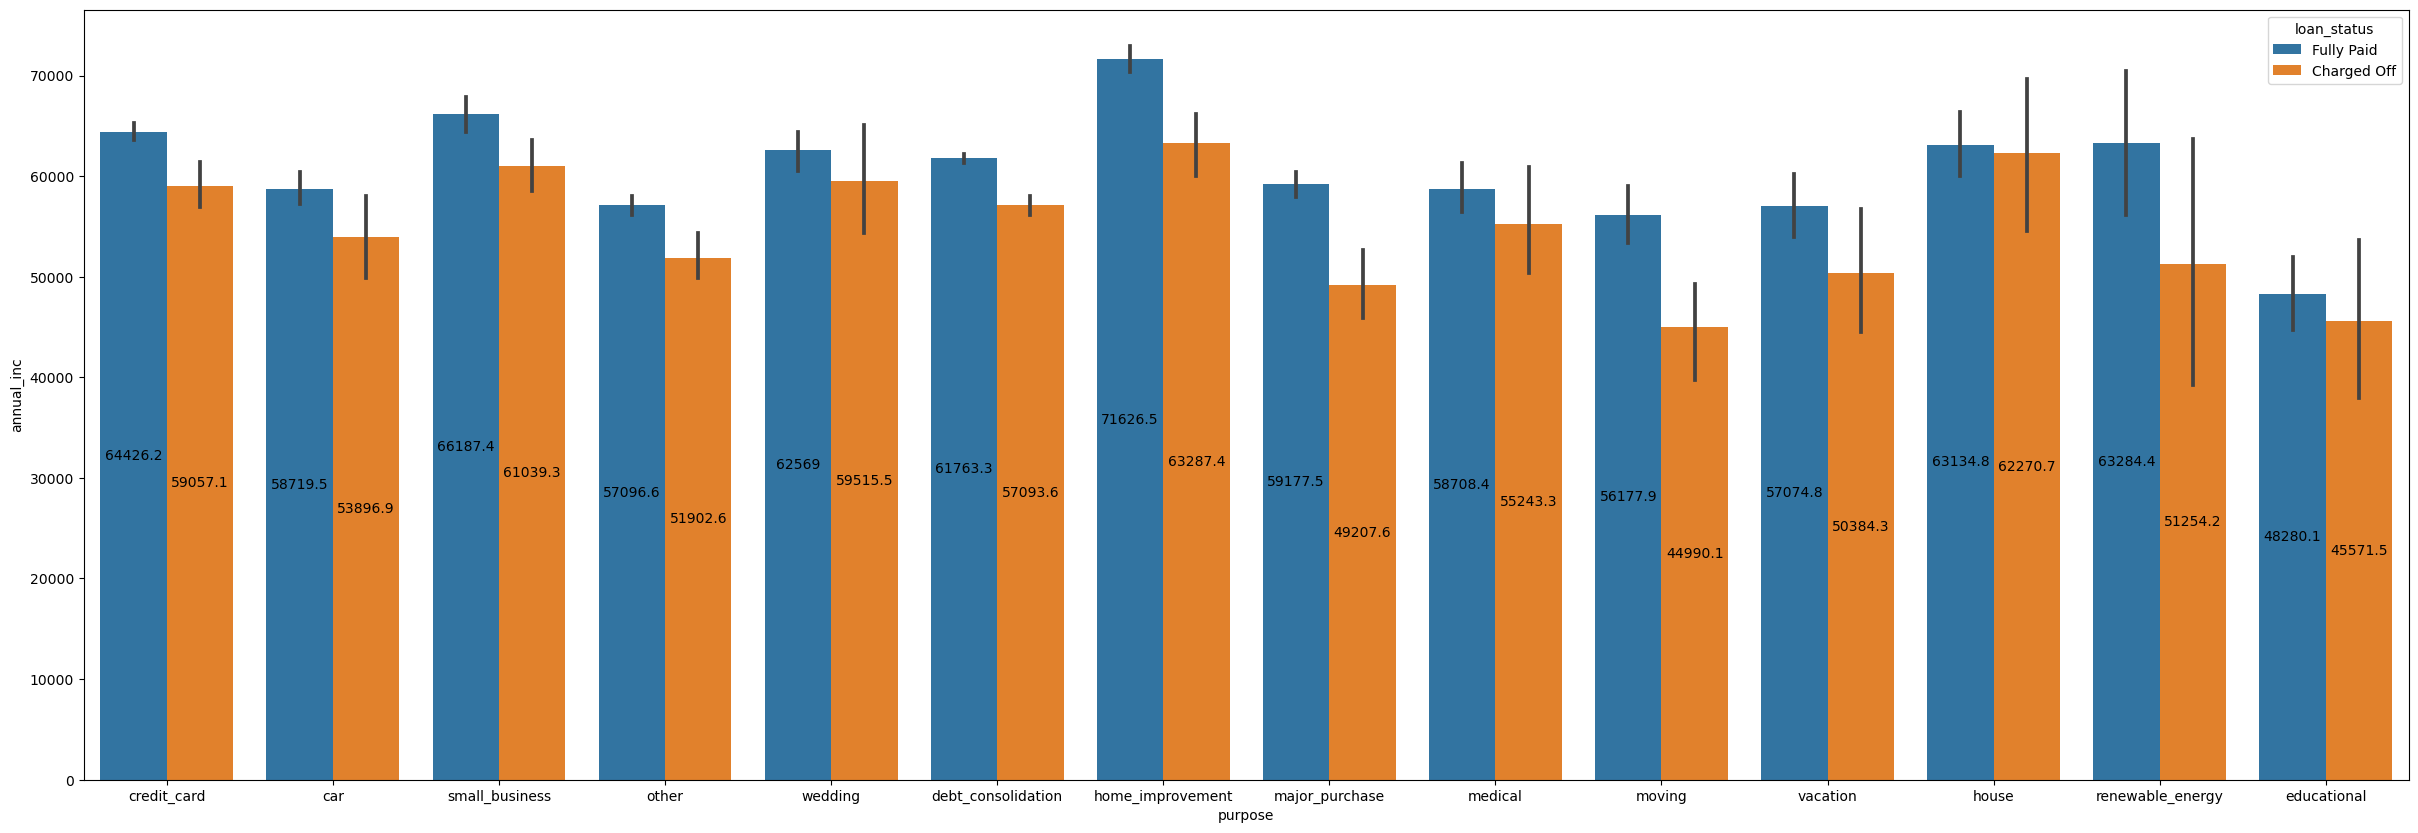

In [251]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x='purpose', y='annual_inc', hue='loan_status', data= loan_aft_annual_inc_outlier_removal)
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

<Axes: xlabel='purpose', ylabel='annual_inc'>

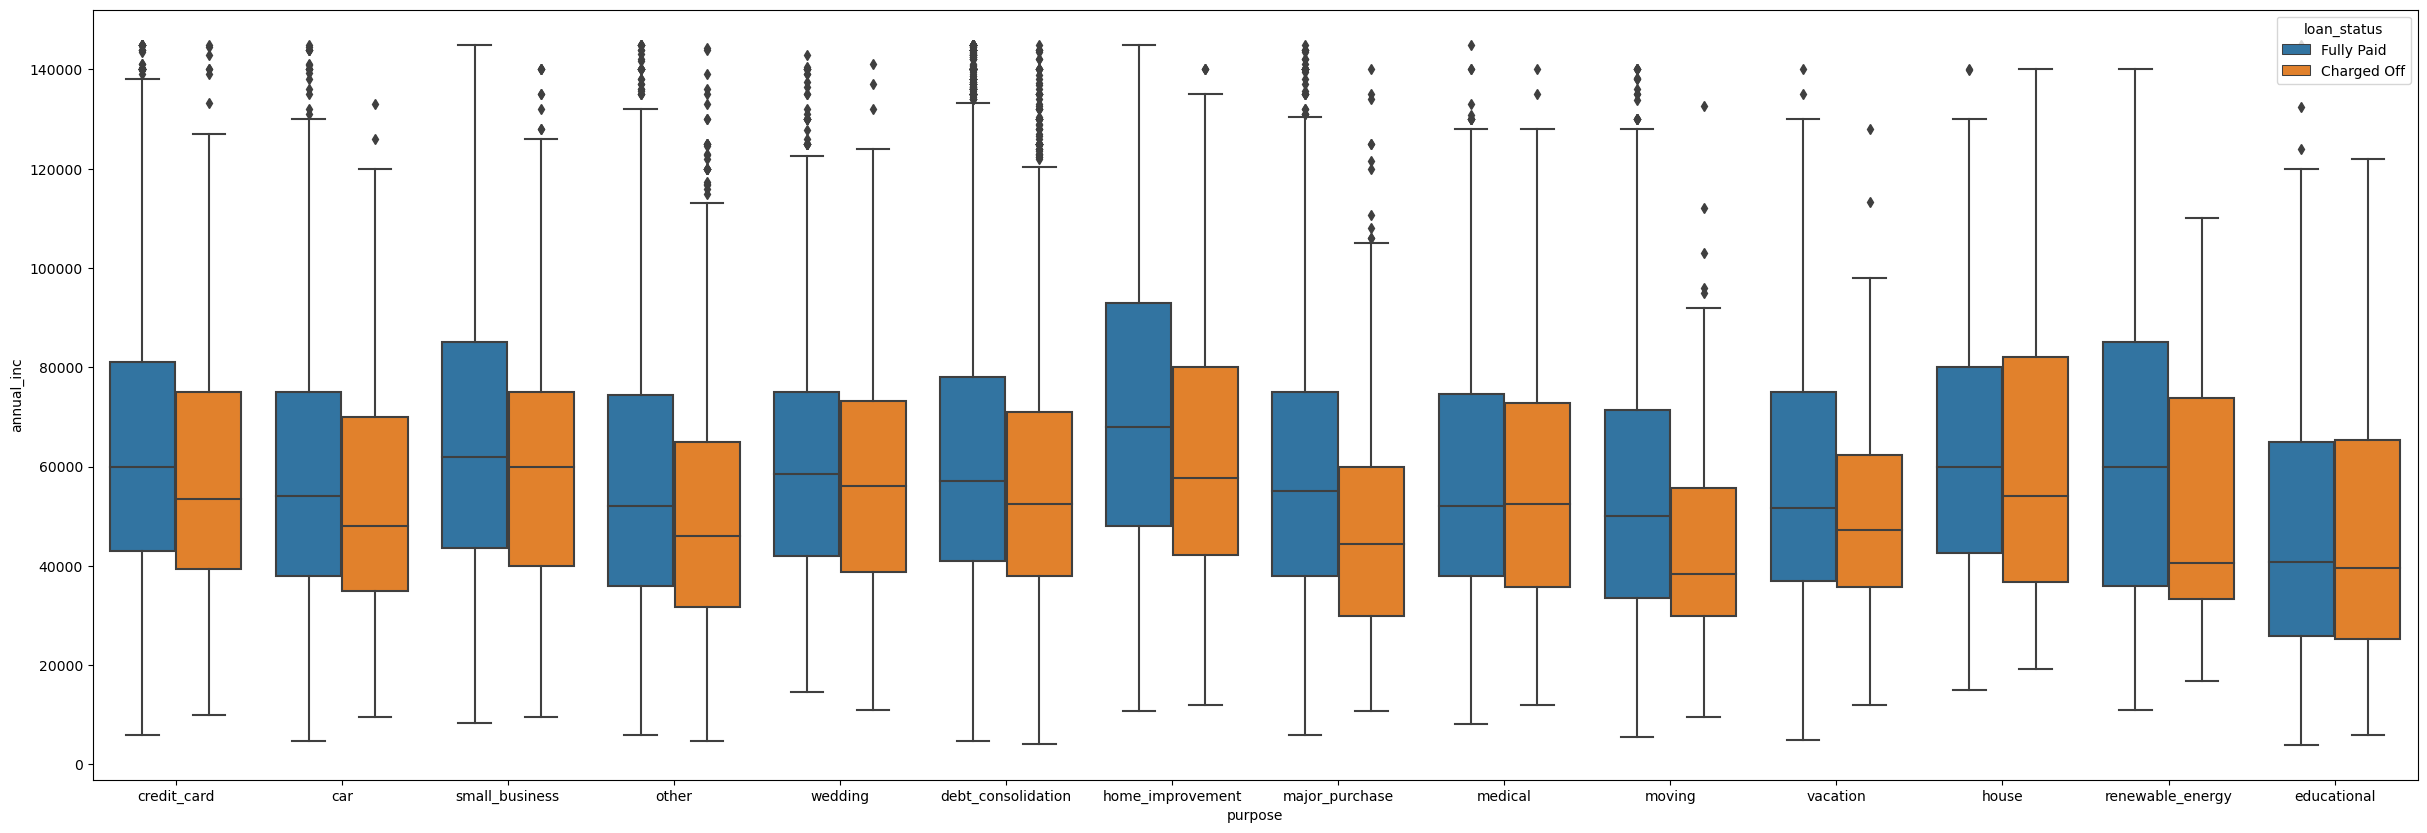

In [255]:
plt.figure(figsize=(30,10))
sns.boxplot(x='purpose', y='annual_inc', hue='loan_status', data= loan_aft_annual_inc_outlier_removal)

## Observation
People taking loan for home improvement, small business, house and renewable energy also seem to earn well. One more thing to note is for home improvement, house and renewable energy defaulters median is quite below fully paid ones. But in case of small business even if you earn well there is a 50-50 chance you might default.

### Analyse annual_inc and grade

<Axes: xlabel='grade', ylabel='annual_inc'>

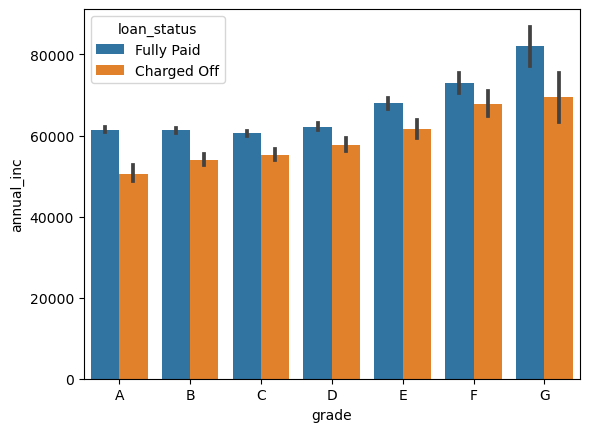

In [256]:
sns.barplot(x=loan.grade.sort_values(), y='annual_inc', hue='loan_status', data= loan_aft_annual_inc_outlier_removal)

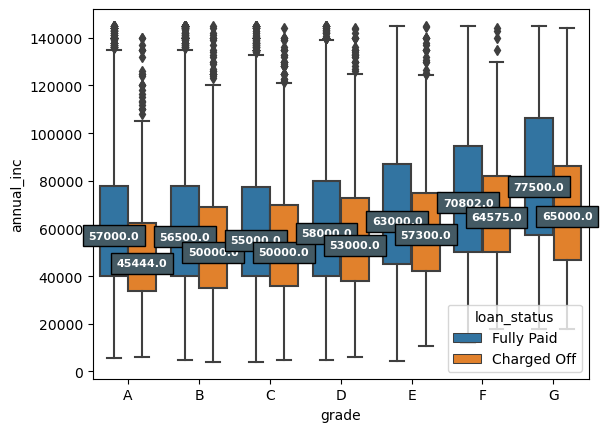

In [290]:
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center', size = 8,
                       fontweight='bold', color='white', bbox=dict(facecolor='#445A64'))


ax = sns.boxplot(x=loan.grade.sort_values(), y='annual_inc', hue='loan_status', data= loan_aft_annual_inc_outlier_removal)
add_median_labels(ax)

In [299]:
loan[(loan.grade == 'G') & (loan.loan_status == "Charged Off")].annual_inc.quantile(0.75)

94000.0

In [300]:
loan[(loan.grade == 'G')].loan_status.value_counts()

Fully Paid     198
Charged Off    101
Name: loan_status, dtype: int64

## Observation
We see people who earn quite high are placed in grade G, but when we look at boxplot we get to know people who default are having less annual income compared to there counterpart. 
And all who requested for loan having income more then 94000.0 (75% of charged off grade G borrower) have Fully Paid their loan.


### Analyse funded_amnt_inv and annual_inc

<Axes: xlabel='funded_amnt_inv', ylabel='annual_inc'>

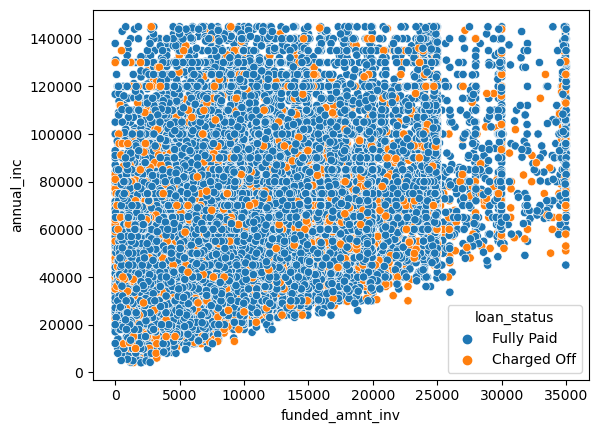

In [226]:
sns.scatterplot(x='funded_amnt_inv', y='annual_inc', data=loan_aft_annual_inc_outlier_removal, hue='loan_status')

<Axes: xlabel='funded_amnt_inv', ylabel='annual_inc'>

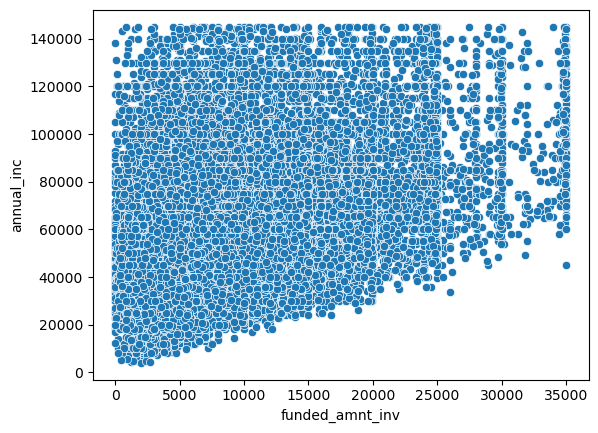

In [229]:
sns.scatterplot(x='funded_amnt_inv', y='annual_inc', data=loan_aft_annual_inc_outlier_removal[loan_aft_annual_inc_outlier_removal.loan_status == 'Fully Paid'])

<Axes: xlabel='funded_amnt_inv', ylabel='annual_inc'>

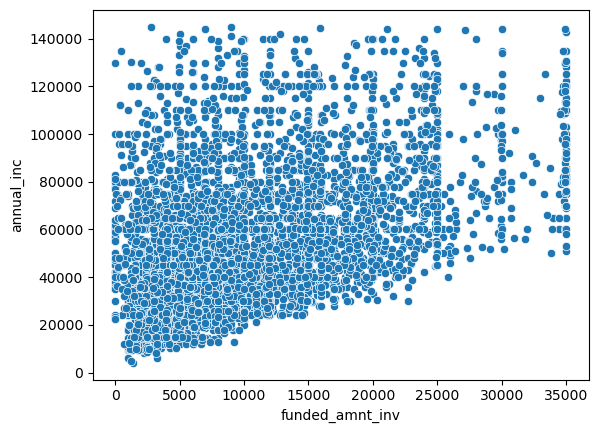

In [230]:
sns.scatterplot(x='funded_amnt_inv', y='annual_inc', data=loan_aft_annual_inc_outlier_removal[loan_aft_annual_inc_outlier_removal.loan_status == 'Charged Off'])

## Observation
They both show similar pattern. We can assume that people who have less annual_inc request for less amount of loan. Also majority of loans are ranging from 5000 to 15000

### Analyse annual_inc and installment

<Axes: xlabel='annual_inc', ylabel='installment'>

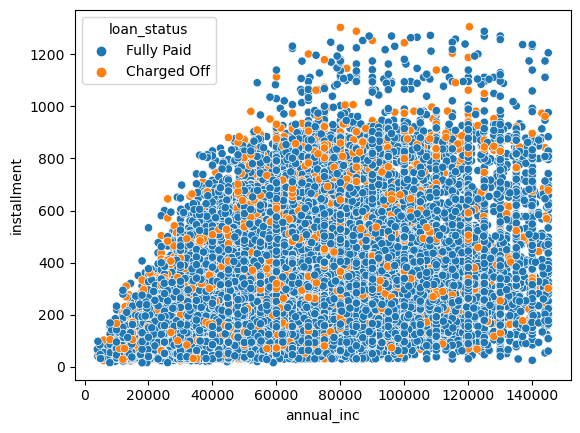

In [235]:
sns.scatterplot(x='annual_inc', y='installment', data=loan_aft_annual_inc_outlier_removal, hue='loan_status')

<Axes: xlabel='annual_inc', ylabel='installment'>

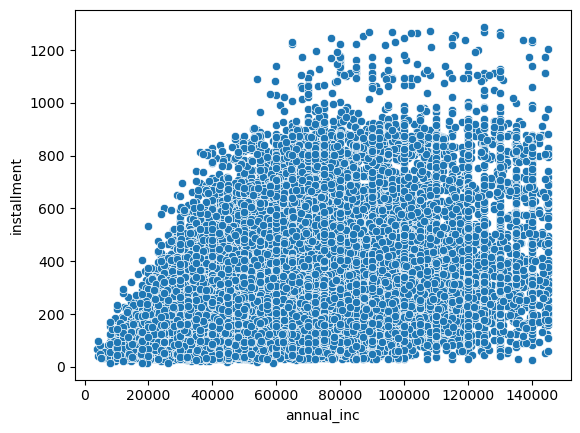

In [236]:
sns.scatterplot(x='annual_inc', y='installment', data=loan_aft_annual_inc_outlier_removal[loan_aft_annual_inc_outlier_removal.loan_status == 'Fully Paid'])

<Axes: xlabel='annual_inc', ylabel='installment'>

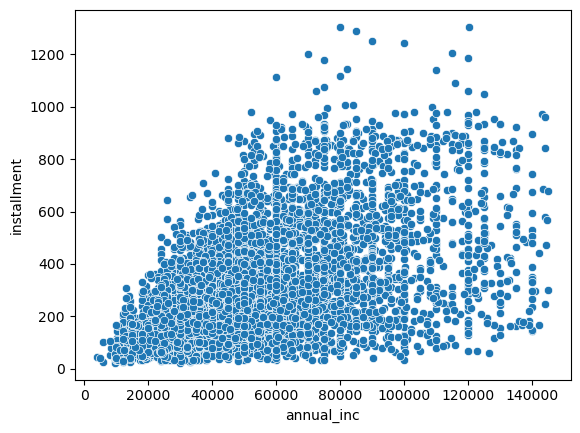

In [237]:
sns.scatterplot(x='annual_inc', y='installment', data=loan_aft_annual_inc_outlier_removal[loan_aft_annual_inc_outlier_removal.loan_status == 'Charged Off'])

## Observation
We see that people who have less income are going for small installments which is intutive too. Maybe they choosing longer tenure to keep installment amount less.

### Analyse funded_amnt_inv and dti

<Axes: xlabel='funded_amnt_inv', ylabel='dti'>

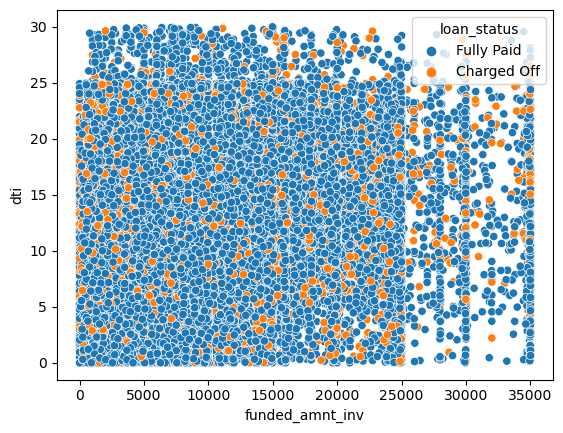

In [238]:
sns.scatterplot(x='funded_amnt_inv', y='dti', data=loan, hue='loan_status')

<Axes: xlabel='funded_amnt_inv', ylabel='dti'>

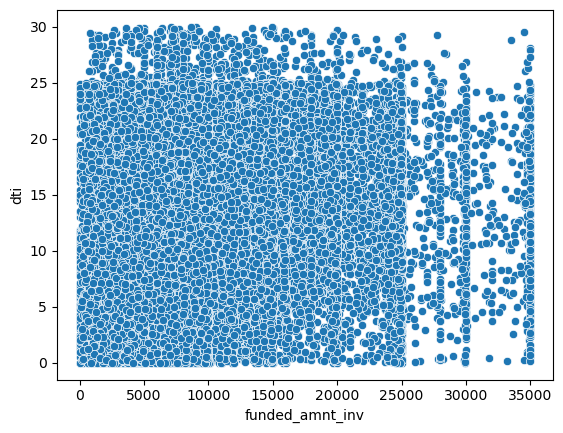

In [239]:
sns.scatterplot(x='funded_amnt_inv', y='dti', data=loan[loan.loan_status == 'Fully Paid'])

<Axes: xlabel='funded_amnt_inv', ylabel='dti'>

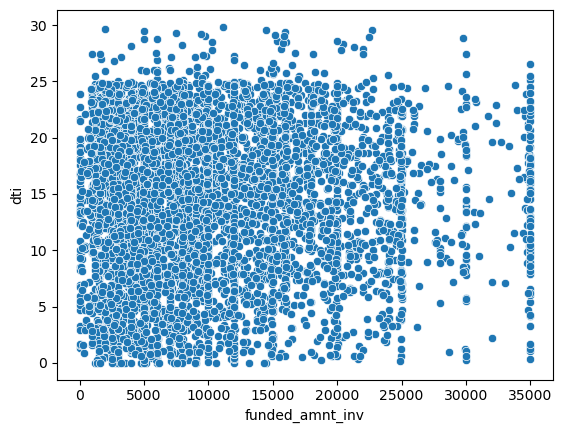

In [240]:
sns.scatterplot(x='funded_amnt_inv', y='dti', data=loan[loan.loan_status == 'Charged Off'])

## Observation
We see no specific pattern here.

# Correlation Matrix

C:\Users\I334253\AppData\Local\Temp\ipykernel_29848\1905652830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan.corr()


<Axes: >

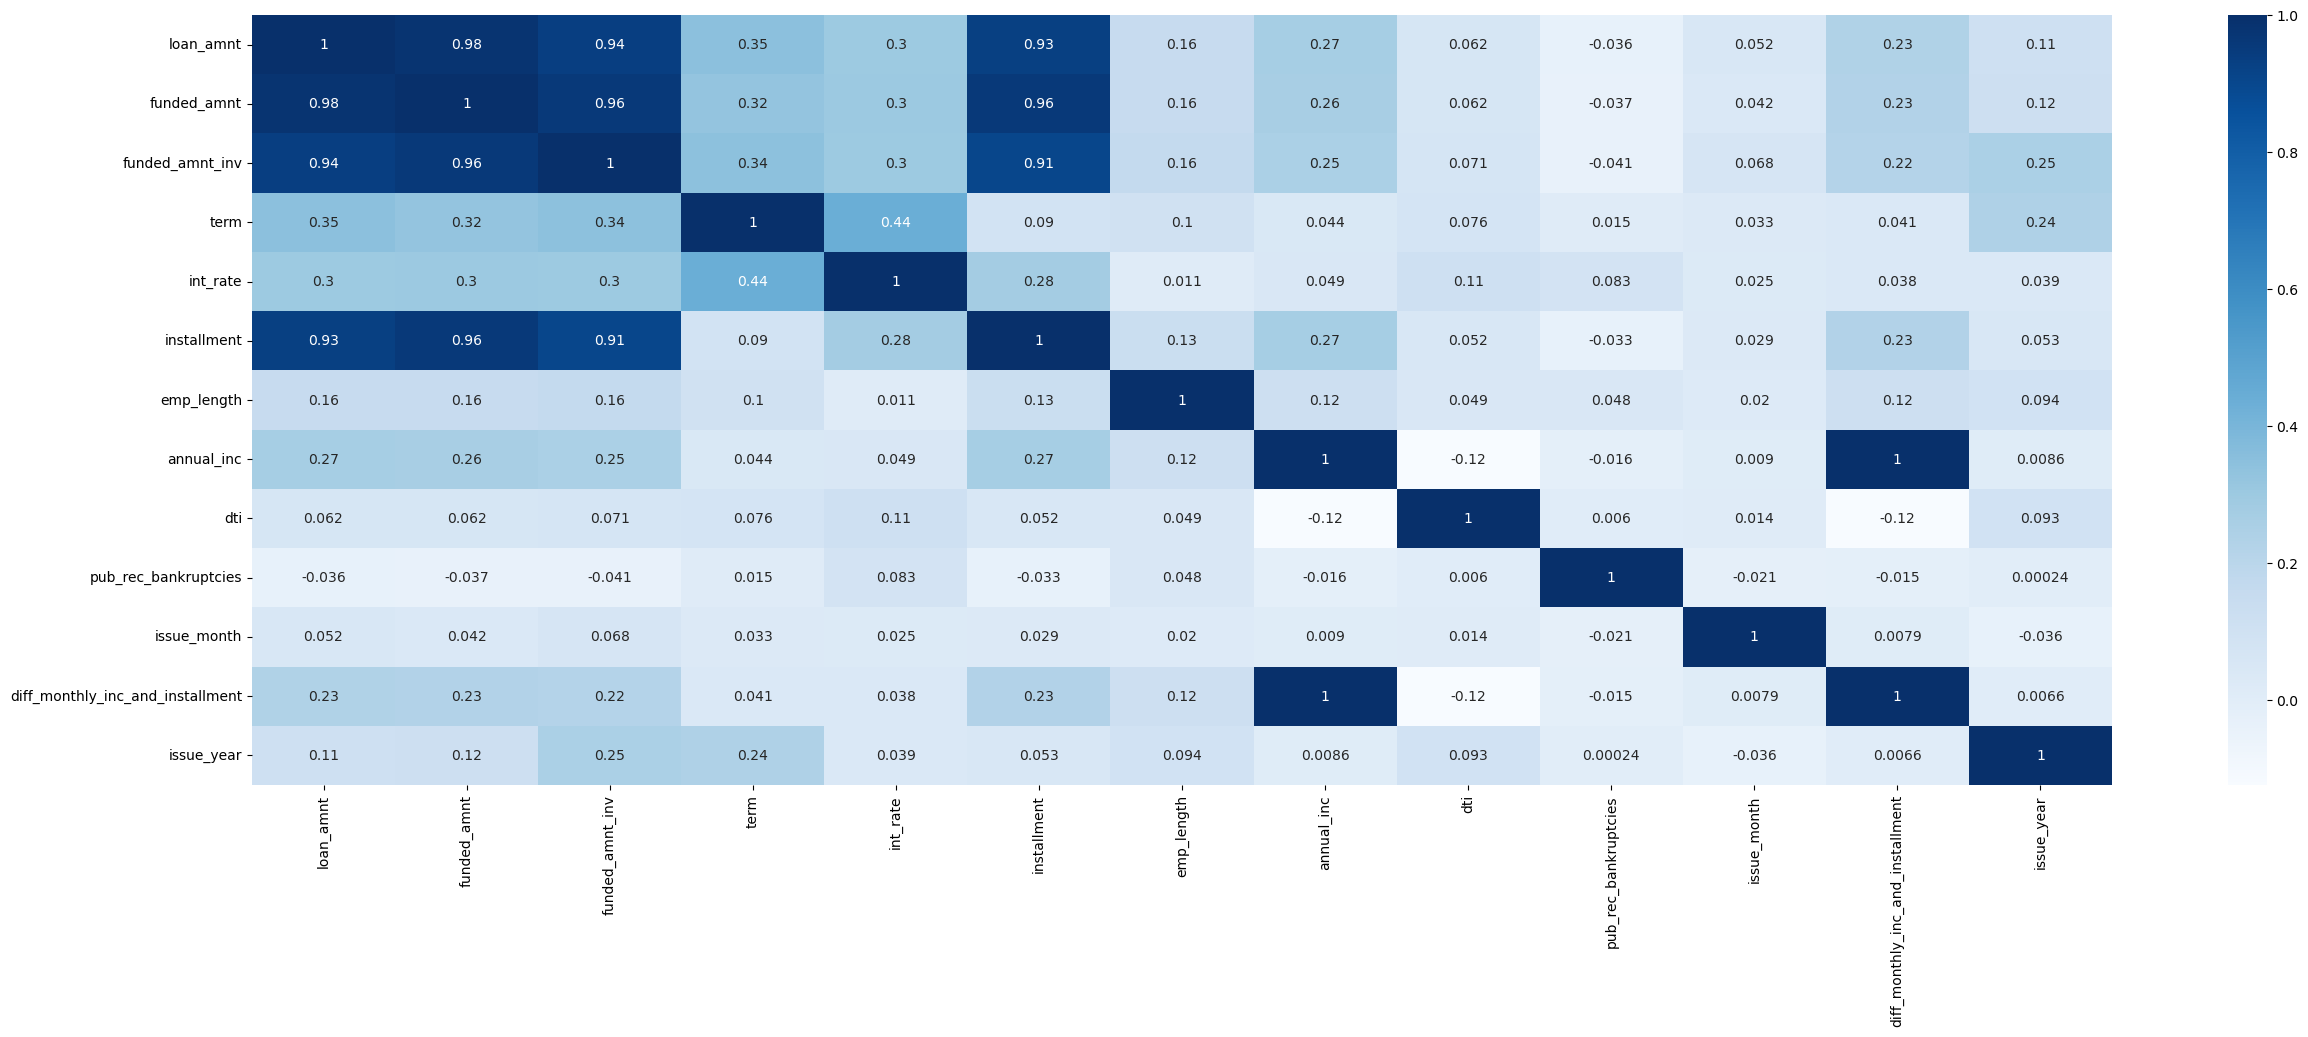

In [244]:
correlation_matrix = loan.corr()
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot = True, cmap='Blues')


## Observation
1> int_rate is postively correlated to term. Hence longer the term, more the interest. </br>
2> dti and annual_inc is negatively correlated. If one is earning good there is a fair change they would be able to better manage their debt.

# Conclusion
#### <b>1></b> Grade E,F,G are more likely to default but in Grade G are the people who request for large fund amount and more than 50% of them Fully Pay it back. Hence rejecting their application is not a solution but we can have high interest on it. </br>
#### <b>2></b> Borrowers from Grade G who requested for loan having annual income more than 94000.0 have Fully Paid their loan. So we might give them better offers considering their credit score and background verification. </br>
#### <b>3></b> Highest percentage of charge offs are seen in case of small business. It shows this is the risky one and proper analysis should be done about the borrower before approving loan for small business purpose. </br> 
#### <b>4></b> Here we see that people who are unemployed or haven't completed 1 year of employment yet are more likely to default. Hence approver should be cautious when approving their loan request. </br>
#### <b>5></b> We see loans taken for home improvement, moving, house and renewable energy are most likely to be fully paid. </br>
#### <b>6></b> Loans with longer term have high probability of resulting in a charged off, hence give it on high interest rate. 